# Plan to do

Learn the OpenMM (basic, advanced, implementations)

## Basic

```
1. Run your first OpenMM example, and understand each Python code (Please look at the test example showed in the link: https://openmm.org/)

2. Learn how to run baisc MD simulations

2.1. Import the force fields, including the OpenMM, CHARMM, and Gromacs format, etc... and also create the system,  integrator, simulation objects; Export/save them into the xml files. Suggested parmed: https://parmed.github.io/ParmEd/html/gromacs.html.

2.2. Extract the essential information: for example, positions (atoms, sytem), parameters (charges, L-J parameteres, bonded terms, ...), ...

2.3. Energy calculations and minimization; Print out the steps, energies, ...

2.4. NVE, NVT, and NPT simulations; save trajectories (dcd files), print out outputs (time, energies, temperatures, ...)

```

## Advanced

```
1. Modified the force fields from the changed files, for example, add or change the atom types. You can select the HyRes models as the example.

2. Modified the force fields by typing the OpenMM commands, for example, adding/delete the atoms types, changing the parameters, ...

3. Using the custom forces. For example, how to add a Harmonic force for a particular atom; hwo to delete the nonboned forces and add new nonboned forces, ... (Refer to http://docs.openmm.org/latest/userguide/theory.html#custom-forces)

```

## Implementations

```
1. HyRes: electrostatic/H-B terms --> tests (energy, NVE, and bechmarking), please refer to the HyRes tutorial (Link: https://github.com/XipingGong/hyrestutorial)

2. HyRes/SASA: do the similar things as the step 1, including the implementations and validations.

```

**How to do**
```
1. Use the Jupyter notebook (used the running the first openmm example as an example to make the Jupyter notebook), ...

2. Use the email list (chenlab@chem.umass.edu) to ask the questions about the OpenMM, ...
The title could be "OpenMM - regular title you want"

```

**Expectation**
```
1. To create a jupyter notebook

2. To ask more questions you have
```

# OpenMM Taining example

**Week1: 2022_09_12 to 2022_09_17**

```
Goal: Try to finish the basic study of OpenMM

```

**2022_09_13**
```
Goal:
1. Run your first OpenMM example, and understand each Python code (Please look at the test example showed in the link: https://openmm.org/)

2. Learn how to run baisc MD simulations

2.1. Import the force fields, including the OpenMM, CHARMM, and Gromacs, etc... and also create the system,  integrator, simulation objects; Export/save them into the xml files. Suggested parmed: https://parmed.github.io/ParmEd/html/gromacs.html.

```

## Run Test
```
Start with examples
```
### Starter test 
```
Run the first example
```

In [6]:
# the first exmaple was copied from https://openmm.org/, which is a basic OpenMM code to run a basic MD simulation
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

# the pdb is copied from /home/yumzhang/pikes_work/4-rest/ana/script atomistic one used for REST3 without water.
pdb = PDBFile('/home/yumzhang/openmm/inp/1kdx_at-prot.pdb')
# OpenMM intrinsic FF
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds) # HBbond is any H-involved bond
# execute Langevain thermo @ 300K, 1 ps friction rate, 0.002 ps step size 
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
# read in the original coordinates from PDB file
simulation.context.setPositions(pdb.positions)
# check how to specify minimization function? 
simulation.minimizeEnergy(tolerance=5*kilojoule/mole,maxIterations=100)
#simulation.reporters.append(PDBReporter('/home/yumzhang/openmm/outp/1kdx_at-output.pdb', 1000))
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/outp/1kdx_at-output.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(10000)
# The results can be found by visualizing 'view-minimization-kid.vmd'

/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:442: UserWarning: WARNING: two consecutive residues with same number (ATOM      7  N   THR     1      26.670  40.980  36.850  1.00  0.00              , ATOM      6  O   ACE     1      25.300  39.580  38.030  1.00  0.00              )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/simtk/openmm/app/internal/pdbstructure.py:442: UserWarning: WARNING: two consecutive residues with same number (ATOM    476  N   NME    28      43.220  29.630  35.560  1.00  0.00              , ATOM    475  O   PRO    28      42.520  31.720  35.910  1.00  0.00              )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,-3663.2515676287185,283.8307822109688
2000,-3806.8150441912185,317.32632513451904
3000,-3930.7896535662185,294.99608488444204
4000,-3826.4507863787185,297.43352983579194
5000,-4026.8492238787185,310.2196152883436
6000,-3955.4293020037185,284.19904423634586
7000,-4100.8707082537185,300.6005570843982
8000,-4017.1607473162185,301.3431129744338
9000,-4129.1802785662185,311.56440032685674
10000,-4189.9800832537185,303.9309652700089


**Conclusion 1**
```
1. OpenMM has built_in E_mini function, we may not be able to specify algorithm like abnr...?
2. 
```
### Output test
```
1. Excersize with OpenMM force field
2. Try output xml files
```

In [10]:
pdb = PDBFile('/home/yumzhang/openmm/inp/1kdx_at-prot.pdb')
# OpenMM intrinsic FF
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds) # HBbond is any H-involved bond
# execute Langevain thermo @ 300K, 1 ps friction rate, 0.002 ps step size 
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
# read in the original coordinates from PDB file
simulation.context.setPositions(pdb.positions)
simulation.saveState('/home/yumzhang/openmm/outp/1kdx_at-output.xml')
# check how to specify minimization function? 
simulation.minimizeEnergy(tolerance=5*kilojoule/mole,maxIterations=100)
# if we specify velocity, we can get the info
simulation.saveState('/home/yumzhang/openmm/outp/1kdx_at-mini-output.xml')
#simulation.reporters.append(PDBReporter('/home/yumzhang/openmm/outp/1kdx_at-output.pdb', 1000))
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/outp/1kdx_at-output.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.reporters.append(CheckpointReporter('/home/yumzhang/openmm/outp/1kdx_at-checkpnt.chk', 5000))
simulation.step(10000)


#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,-3607.4478566912185,271.77866526306263
2000,-3583.2554738787185,320.9888788673126
3000,-3860.4429738787185,301.5942894137284
4000,-3962.8404348162185,294.38781927821753
5000,-4102.4859426287185,282.88900631334025
6000,-4145.0669973162185,303.242652521316
7000,-4042.4234426287185,314.5807112117195
8000,-3999.3628957537185,300.1846376382987
9000,-4078.0660207537185,289.3836359037075
10000,-4055.7877004412185,312.2702171079101


**Conclusion 2**
```
1. we can save the states with xml files. It's ok for us to save sates after each step/executation.
2. Velocity?
```
### Amber FF Test
```
Goal: read in GAFF from previous preparation!
2022_09_14
```

In [15]:
# ParmEd Imports
import parmed as pmd
from parmed import load_file, unit as u
from parmed.openmm import StateDataReporter, NetCDFReporter

In [18]:
## sample from ebn ligand parameter:
# /home/yumzhang/pikes_work/tutorial/ligand_building/2yol/s1-setup/
# ligand: EBN
# Amber GAFF 
prmtop = AmberPrmtopFile('/home/yumzhang/pikes_work/tutorial/ligand_building/2yol/s1-setup/ebn_gaff.prmtop')
# inpcrd is for coor info, "like" pdb
inpcrd = AmberInpcrdFile('/home/yumzhang/pikes_work/tutorial/ligand_building/2yol/s1-setup/ebn_gaff.prmcrd')
## No longer need to specify the system...
system = prmtop.createSystem() # HBbond is any H-involved bond
# execute Langevain thermo @ 300K, 1 ps friction rate, 0.002 ps step size 
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(prmtop.topology, system, integrator)
# read in the original coordinates from PDB file
simulation.context.setPositions(inpcrd.positions)
if inpcrd.boxVectors is not None:
    simulation.context.setPeriodicBoxVectors(*inpcrd.boxVectors)
simulation.saveState('/home/yumzhang/openmm/outp/amber-test-ebn-output.xml')
# check how to specify minimization function? 
simulation.minimizeEnergy(tolerance=5*kilojoule/mole,maxIterations=100)
simulation.saveState('/home/yumzhang/openmm/outp/amber-test-ebn-mini-output.xml')
#simulation.reporters.append(PDBReporter('/home/yumzhang/openmm/outp/1kdx_at-output.pdb', 1000))
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/outp/amber-test-ebn-output.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.reporters.append(CheckpointReporter('/home/yumzhang/openmm/outp/amber-test-ebn-checkpnt.chk', 5000))
simulation.step(10000)


#"Step","Time (ps)","Potential Energy (kilocalorie/mole)","Kinetic Energy (kilocalorie/mole)","Total Energy (kilocalorie/mole)","Temperature (K)"
1000,2.0000000000000013,391133.3054493308,74.42023555960071,391207.72568489035,293.7229164029658
2000,3.999999999999781,391131.6622848948,88.4356306470489,391220.09791554185,349.0390906755962
3000,5.999999999999561,391135.42662523896,75.27793850927804,391210.70456374827,297.1081114361754
4000,7.999999999999341,391131.39340344165,79.85175324757057,391211.24515668926,315.1601129370608
5000,10.000000000000009,391133.66395793494,81.20891961480987,391214.8728775498,320.51659777525094
6000,12.000000000000677,391131.901290631,66.32804827511767,391198.22933890607,261.78454868073777
7000,14.000000000001345,391126.73279158695,75.85128199667037,391202.58407358365,299.3709922232519
8000,16.00000000000201,391129.5411089866,73.0361754776301,391202.5772844642,288.26028704286705
9000,18.000000000000902,391119.9808795411,78.46374868506113,391198.44462822616,3

**Conclusion 3**
```
1. something super werid... The energy is too large
2. No need to specify the nonbonded method like PME...
```
### CHARMM FF Test
```
Goal: Test general CHARMM FF, i.e., c22
```

In [19]:
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/gb1p.psf')
pdb = PDBFile('/home/yumzhang/openmm/inp/gb1p.pdb')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top_all22_prot_cmap.inp', '/home/yumzhang/openmm/inp/par_all22_prot_gbsw.inp')
#Key points: System created based on PSF.
system = psf.createSystem(params, nonbondedMethod=NoCutoff,
        nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
#SImilar: PSF!
simulation = Simulation(psf.topology, system, integrator)
simulation.context.setPositions(pdb.positions)
simulation.saveState('/home/yumzhang/openmm/outp/c22-test-gb1p-output.xml')
simulation.minimizeEnergy(tolerance=5*kilojoule/mole,maxIterations=100)
simulation.saveState('/home/yumzhang/openmm/outp/c22-test-gb1p-mini-output.xml')
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/outp/chm22_gb1p.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(10000)

#"Step","Time (ps)","Potential Energy (kilocalorie/mole)","Kinetic Energy (kilocalorie/mole)","Total Energy (kilocalorie/mole)","Temperature (K)"
1000,2.0000000000000013,84.0028868578588,181.20909643129767,265.2119832891565,282.7530198746884
2000,3.999999999999781,65.51940217756632,187.12125464972914,252.64065682729546,291.9781670839635
3000,5.999999999999561,42.33923013078095,194.18999717533444,236.5292273061154,303.00801235770405
4000,7.999999999999341,58.90432324965643,177.87285906153178,236.77718231118823,277.54725918221817
5000,10.000000000000009,49.007904461191444,195.77656811669496,244.7844725778864,305.48364814944915
6000,12.000000000000677,76.8582579282684,197.89401471105546,274.75227263932385,308.78764574542964
7000,14.000000000001345,56.76130947601727,194.7057964035397,251.46710587955695,303.81284937911346
8000,16.00000000000201,46.958967103101095,199.5124026694928,246.47136977259387,311.3129278178474
9000,18.000000000000902,52.29274538233449,193.07470121946236,245.367446601

**Conclusion 4**
```
1. Charmm psf file is super i,portant!
```
#### For future test
```
1. try SPIN/MPO C36m system input.
2. try HyRes input with Parmed
```
### GROMACS Test
```
Goal: try a99sb-disp with gmx
```

In [ ]:
# ref:
# https://parmed.github.io/ParmEd/html/omm_gromacs.html
from __future__ import division, print_function
import sys
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
#from parmed import unit as u
from parmed import gromacs

includeDir=gromacs.GROMACS_TOPDIR = "/home/ping/Program/gromacs/gromacs-2020-rc1/share/top"

gmx_top = gromacs.GromacsTopologyFile('/home/yumzhang/pikes_work/4-rest/rest3/p53/s7-prod/p53_at_ext/rep0/topol.top')
gmx_gro = gromacs.GromacsGroFile.parse('/home/yumzhang/pikes_work/4-rest/rest3/p53/s7-prod/p53_at_ext/rep0/prod.gro')
#gmx_top = pmd.load_file('/home/yumzhang/pikes_work/4-rest/rest3/p53/s6-setuprest/script/p53_at.top')
#gmx_gro = pmd.load_file('/home/yumzhang/pikes_work/4-rest/rest3/p53/s7-prod/p53_at_ext/rep0/prod.gro')
system = gmx_top.createSystem()

# Notice the app.*
#system = gmx_top.createSystem(gmx_gro.topology,
#                             #nonbondedCutoff=1*unit.nanometer,
#                             #nonbondedMethod=app.CutoffPeriodic,
#                             constraints=app.HBonds,
#                             rigidWater=False) # OpenMM System creation

integ = mm.LangevinIntegrator(
                        300*unit.kelvin,       # Temperature of heat bath
                        1.0/unit.picoseconds,  # Friction coefficient
                        2.0*unit.femtoseconds, # Time step
)

# Applying GPU
#plat = mm.Platform.getPlatformByName('CUDA')
#prop = dict(CudaPrecision='mixed') # Use mixed single/double precision
# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}
    
#create simulations
simul = app.Simulation(gmx_top.topology, system, integ, plat, prop)

#set the particle positions
simul.context.setPositions(gmx_gro.positions)

# minimization

simul=simul.minimizeEnergy(tolerance=5*kilojoule/mole,maxIterations=100)
simul.reporters.append(PDBReporter('/home/yumzhang/openmm/outp/p53_at_ext-gmx.pdb', 1000))
simul.reporters.append(StateDataReporter(stdout, 1000, step=True,
       potentialEnergy=True, temperature=True))
simul.step(10000)

**Conclusion 5**
```
1. If we directly load the top files from gromacs, we will meet virtual sites problems, like info below:
"""Virtual sites not yet supported by Gromacs parsers"""
2. If we try load_file... errror message below:
""" 'module' object is not callable """
```

**Note**
```
About the NVT, NPT, NVE example, is on my personal laptop. Will update it here later.
Reason: A crashed Jupyter-lab between 2022_09_22 ~ 2022_09_26
```

## Energy and forces

In [ ]:
state = simulation.context.getState(getEnergy=True)


energy = state.getPotentialEnergy() / unit.kilocalories_per_mole
        
def report(self, simulation, state):
        forces = state.getForces().value_in_unit(u.kilojoules/u.mole/u.nanometer)
        for f in forces:
            self._out.write('%g %g %g\n' % (f[0], f[1], f[2]))        

## Thermo Test

Take intrinsic amber ff in OPenMM as an expample. 

PDB: KID (Atomistic without water).

**Date: 2022_09_26**

**Location: Muk@mac**

(Jupyter on lab desktop suddenly crashed down... No idea why)

**Notes**

How can we setup MD simulations under various conditions, like NVT, NPT?

Tutorial from:

https://github.com/openmm/openmm/issues/3782

Let's try!

### NVE

Generally, 20 ps can be a good choice to stop the NVE calculations.

In [5]:
# the first exmaple was copied from https://openmm.org/, which is a basic OpenMM code to run a basic MD simulation
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

# the pdb is copied from /home/yumzhang/pikes_work/4-rest/ana/script atomistic one used for REST3 without water.
pdb = PDBFile('/home/yumzhang/openmm/inp/1kdx_at-prot.pdb')
# OpenMM intrinsic FF
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds) # HBbond is any H-involved bond

# LangevinIntegrator --> NVT
# execute Langevain thermo @ 300K, 1 ps friction rate, 0.002 ps step size 
#integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

# Integrator --> NVE
integrator = VerletIntegrator(0.001*picoseconds) ## Eseential part

simulation = Simulation(pdb.topology, system, integrator)
# read in the original coordinates from PDB file
simulation.context.setPositions(pdb.positions)
# check how to specify minimization function? 
simulation.minimizeEnergy(tolerance=1*kilojoule/mole,maxIterations=1000)
#simulation.reporters.append(PDBReporter('/home/yumzhang/openmm/outp/1kdx_at-output.pdb', 100))
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/outp/1kdx_at-nve-output.dcd', 100))
simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
        potentialEnergy=True, temperature=True, totalEnergy=True))

print('# NVE simulation')
simulation.step(1000)
# The results can be found by visualizing 'view-minimization-kid.vmd'

# NVE simulation
#"Step","Potential Energy (kJ/mole)","Total Energy (kJ/mole)","Temperature (K)"
100,-4927.327899644368,-4926.245401252093,0.21789896396461647
200,-4929.216571519368,-4926.283355471072,0.5904348150253123
300,-4930.891376206868,-4926.371624131052,0.9097928474771476
400,-4933.098407456868,-4926.372467567388,1.3538822265832589
500,-4936.876727769368,-4926.250502858586,2.1389809125246106
600,-4943.488055894368,-4926.293545249426,3.4611285172793362
700,-4958.004657456868,-4926.397833279705,6.362221220433021
800,-4964.357196519368,-4926.543745140732,7.611569622765006
900,-4969.974384019368,-4926.606105287892,8.729715509931273
1000,-4980.005634019368,-4926.65978922475,10.738126167686064


### NVT/NPT

In [1]:
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

# Function to add backbone position restraints

# However, currently, we don't need to make the system such complicated. 
## Put here as an example that we may use later.
def add_backbone_posres(system, positions, atoms, restraint_force):
    force = CustomExternalForce("k*periodicdistance(x, y, z, x0, y0, z0)^2")
    force_amount = restraint_force * kilocalories_per_mole/angstroms**2
    force.addGlobalParameter("k", force_amount)
    force.addPerParticleParameter("x0")
    force.addPerParticleParameter("y0")
    force.addPerParticleParameter("z0")
    for i, (atom_crd, atom) in enumerate(zip(positions, atoms)):
        if atom.name in  ('CA', 'C', 'N'):
            force.addParticle(i, atom_crd.value_in_unit(nanometers))
    posres_sys = deepcopy(system)
    posres_sys.addForce(force)
    return posres_sys

# Set up 

# the pdb is copied from /home/yumzhang/pikes_work/4-rest/ana/script atomistic one used for REST3 without water.
pdb = PDBFile('/home/yumzhang/openmm/inp/1kdx_at-prot.pdb')
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')

## Add solvent
modeller = Modeller(pdb.topology, pdb.positions)
modeller.addSolvent(forcefield, padding=1.0*nanometers)

## Write out the new PDB file to check!
#simulation.reporters.append(PDBReporter('/home/yumzhang/openmm/1kdx_at-solv.pdb'))

#System preperation 
system = forcefield.createSystem(modeller.topology, nonbondedMethod=app.PME,
    nonbondedCutoff=1.0*nanometers, constraints=app.HBonds, rigidWater=True,
    ewaldErrorTolerance=0.0005)
#posres_sys = add_backbone_posres(system, modeller.positions, modeller.topology.atoms(), 0)

# Langevin setup, NVT @ 300K. See Integrator
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.001*picoseconds) ## Essential part --> NVT
integrator.setConstraintTolerance(0.00001)
#simulation = Simulation(modeller.topology, posres_sys, integrator)
simulation = Simulation(modeller.topology, system, integrator)

simulation.reporters.append(
    StateDataReporter(
        stdout,
        2000,
        step=True,
        potentialEnergy=True,
        temperature=True,
        volume=True,
        density=True
    )
)
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/inp/1kdx_at-solv-nvt.dcd',2000))

#Minimize
print('NVT Minimizing...')
simulation.context.setPositions(modeller.positions)
simulation.minimizeEnergy()
simulation.step(20000) # nvt

#Write out the pdb at the last step

#simulation.reporters.append(PDBReporter(('/Users/muk/Desktop/work/programming/openmm/1kdx_at-solv-mini.pdb')).as_posix(),1000)

#WarmUp with a NVT run.  Slowly warm up temperature - every 1000 steps raise the temperature by 5 K, ending at 300 K
#simulation.context.setVelocitiesToTemperature(5*kelvin)

#integrator.setTemperature(300*kelvin)

#simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/inp/1kdx_at-solv-nvt.dcd',100))
#NPT equilibration, reducing backbone constraint
# We don't have constraint :3
# We need to add the barostat

print('Running NPT equilibration...(Can have with smaller timestep, not having here)')
# http://docs.openmm.org/latest/userguide/application/02_running_sims.html (ref)
# Note, keep either Anderson/Langevain thermostat for T control. Don't switch the algrithm.
mdsteps = 50
barostat = system.addForce(MonteCarloBarostat(1*atmosphere, 300*kelvin)) ## Essential part --> NPT
simulation.context.reinitialize(True)


# save the equilibration results to file : state is platform independent but less precise, checkpoint file
simulation.saveState('/home/yumzhang/openmm/inp/1kdx_at-solv-eq.xml')
simulation.saveCheckpoint('/home/yumzhang/openmm/inp/1kdx_at-solv-eq.chk')

# Load checkpoint
# reset step and time counters
simulation.loadCheckpoint(('/home/yumzhang/openmm/inp/1kdx_at-solv-eq.chk'))
eq_state = simulation.context.getState(getVelocities=True, getPositions=True)
positions = eq_state.getPositions()
velocities = eq_state.getVelocities()

## Finally a Npt run
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
integrator.setConstraintTolerance(0.00001)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(positions)
simulation.context.setVelocities(velocities)

# run production simulation 
mdsteps = 10000
print('Running NPT Production...')

# append reporters
#simulation.reporters.append(
#    DCDReporter('/home/yumzhang/openmm/inp/1kdx_at-solv-10ns_traj.dcd', 1000))
simulation.reporters.append(
    StateDataReporter(
         stdout,
         1000,
         step=True,
         potentialEnergy=True,
         temperature=True,
         volume=True,
         separator='\t'
        )
    )
simulation.reporters.append(
    PDBReporter(
        '/home/yumzhang/openmm/inp/1kdx_at-solv-final.pdb',
        reportInterval = 100
    )
)
simulation.reporters.append(DCDReporter('/home/yumzhang/openmm/inp/1kdx_at-solv-npt.dcd',1000))


#simulation.reporters.append(StateDataReporter(stdout, 100, step=True
#        potentialEnergy=True, temperature=True, totalEnergy=True, pressure=True))

simulation.step(mdsteps)

print('Done!')
#simulation.saveState(('/home/yumzhang/openmm/inp/1kdx_at-solv-sim_10ns.state'))
#simulation.saveCheckpoint(('/home/yumzhang/openmm/inp/1kdx_at-solv-sim_10ns.chk'))

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/openmm/app/internal/pdbstructure.py:444: UserWarning: WARNING: two consecutive residues with same number (ATOM      7  N   THR     1      26.670  40.980  36.850  1.00  0.00              , ATOM      6  O   ACE     1      25.300  39.580  38.030  1.00  0.00              )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/openmm/app/internal/pdbstructure.py:444: UserWarning: WARNING: two consecutive residues with same number (ATOM    476  N   NME    28      43.220  29.630  35.560  1.00  0.00              , ATOM    475  O   PRO    28      42.520  31.720  35.910  1.00  0.00              )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


NVT Minimizing...
#"Step","Potential Energy (kJ/mole)","Temperature (K)","Box Volume (nm^3)","Density (g/mL)"
2000,-143110.53979505377,249.44720127957578,109.07831895200003,0.9350560890048126
4000,-136327.91479505377,285.5788307083707,109.07831895200003,0.9350560890048126
6000,-135045.41479505377,291.85076187638407,109.07831895200003,0.9350560890048126
8000,-134341.10229505377,295.2309216405289,109.07831895200003,0.9350560890048126
10000,-133859.03979505377,299.85520454976034,109.07831895200003,0.9350560890048126
12000,-133569.66479505377,300.45924842311206,109.07831895200003,0.9350560890048126
14000,-134400.53979505377,302.11116706484086,109.07831895200003,0.9350560890048126
16000,-134216.53979505377,299.1023495779342,109.07831895200003,0.9350560890048126
18000,-133117.66479505377,297.6491937464062,109.07831895200003,0.9350560890048126
20000,-133961.16479505377,291.6180588314732,109.07831895200003,0.9350560890048126
Running NPT equilibration...(Can have with smaller timestep, not havi

In [2]:
import os

# can check dcd file:
os.system('ls -all /home/yumzhang/openmm/inp/*.dcd')
print('\n')
#'/home/yumzhang/openmm/inp/1kdx_at-solv-nvt.dcd'
#'/home/yumzhang/openmm/inp/1kdx_at-solv-npt.dcd'

os.system('head /home/yumzhang/openmm/inp/1kdx_at-solv-final.pdb')
print('\n')
#'/home/yumzhang/openmm/inp/1kdx_at-solv-final.pdb'


-rw-r--r-- 1 yumzhang jianhanc 1217276 Jan  2 14:19 /home/yumzhang/openmm/inp/1kdx_at-solv-10ns_traj.dcd
-rw-r--r-- 1 yumzhang jianhanc 1217276 Jan  2 14:32 /home/yumzhang/openmm/inp/1kdx_at-solv-npt.dcd
-rw-r--r-- 1 yumzhang jianhanc 1217276 Jan  2 14:32 /home/yumzhang/openmm/inp/1kdx_at-solv-nvt.dcd


REMARK   1 CREATED WITH OPENMM 7.7, 2023-01-02
CRYST1   47.780   47.780   47.780  90.00  90.00  90.00 P 1           1 
MODEL        1
HETATM    1  CH3 ACE A   1      28.368  37.822  36.443  1.00  0.00           C  
HETATM    2  H1  ACE A   1      28.152  37.212  37.320  1.00  0.00           H  
HETATM    3  H2  ACE A   1      28.537  37.303  35.500  1.00  0.00           H  
HETATM    4  H3  ACE A   1      29.295  38.380  36.576  1.00  0.00           H  
HETATM    5  C   ACE A   1      27.140  38.724  36.271  1.00  0.00           C  
HETATM    6  O   ACE A   1      26.051  38.209  36.481  1.00  0.00           O  
ATOM      7  N   THR A   2      27.208  40.022  36.133  1.00  0.00         

# OpenMM Advanced Learning

## Custermer_forces

### Applying Simple Harmonic Restraints

**Date: 2022_09_30**

**Object:**

1. Using OPenMM run simulations for $(AAQAA)_{3}$ in HyRes force field.

2. Applying simple Harmonic Restraints to one atom/whole system for $(AAQAA)_{3}$.

3. Quickly check the results.

**Harmonic Force Function:**

$E_{harm}=k*(x-x_{ref})^2$

The input formule should be:

k*((x-xref)^2+(y-yref)^2+(z-zref)^2)

We can get xref, yref, zref using MDTraj or any available tools.


**NVE check**

10 ps is better to evaluate the conservation

In [25]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# Examples from parmed: https://parmed.github.io/ParmEd/html/omm_charmm.html

# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top_idpcg.inp', '/home/yumzhang/openmm/inp/param_idpcg.inp')

print('System setup...')
# Key points: System created based on PSF. 
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

# NVE first to check E conversation
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
print('Minimization...')
simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=1000)
simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-eq.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-nve.hr.dcd', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-nve.hr.sta')
simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
        potentialEnergy=True, temperature=True))

print('# NVE simulation')
simulation.step(1000)

Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

Minimization...
# NVE simulation
#"Step","Time (ps)","Potential Energy (kilocalorie/mole)","Kinetic Energy (kilocalorie/mole)","Total Energy (kilocalorie/mole)","Temperature (K)"
100,0.05000000000000004,-5.212065366668409,0.004194029701408385,-5.207871336967001,0.015691581188272827
200,0.10000000000000007,-5.216374224048272,0.008505196039152995,-5.207869028009118,0.03182141846199346
300,0.1500000000000001,-5.220480676362892,0.012613264111652206,-5.2078674122512405,0.04719138202351188
400,0.20000000000000015,-5.224667361315988,0.016801303123241722,-5.207866058192746,0.06286054958995581
500,0.25000000000000017,-5.22834803360598,0.02047931592573581,-5.2078687176802445,0.07662150042024253
600,0.3000000000000002,-5.232780886881666,0.024913387825851206,-5.207867499055815,0.09321117769218347
700,0.35000000000000026,-5.238331526688818,0.030462587470967514,-5.2078689392178505,0.11397300413610127
800,0.4000000000000003,-5.245843307465941,0.037970964256142194,-5.207872343209799,0.1420649138994363

**Conclusion**: 

Energy conservced, we can further try to add one harmonic restraints into Q8CA atom.

In [ ]:
# Below is an example that add a 3D sephare ball-like restraints to the whole system.

In [5]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# Force Reporter
class ForceReporter(object):
    def __init__(self, file, reportInterval):
        self._out = open(file, 'w')
        self._reportInterval = reportInterval

    def __del__(self):
        self._out.close()

    def describeNextReport(self, simulation):
        steps = self._reportInterval - simulation.currentStep%self._reportInterval
        return (steps, False, False, True, False, None)

    def report(self, simulation, state):
        forces = state.getForces().value_in_unit(u.kilojoules/u.mole/u.nanometer)
        for f in forces:
            self._out.write('%g %g %g\n' % (f[0], f[1], f[2]))

# Here, can add Harmonic restraints to the target
def HarmF(xref,yref,zref):
    '''Get the initial coordinates'''
    return HarmF
# Examples from parmed: https://parmed.github.io/ParmEd/html/omm_charmm.html

# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top_idpcg.inp', '/home/yumzhang/openmm/inp/param_idpcg.inp')

print('System setup...')
# Key points: System created based on PSF. 
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

# === Add force === 

#  Warning!!! (http://docs.openmm.org/latest/userguide/application/04_advanced_sim_examples.html)
#  If you add new forces to a System, 
#  you must do so before creating the Simulation. 
#  Once you create a Simulation, modifying the System will have no effect on that Simulation.

# Notice: units of int(1) is nm!!! K unit is kJ/mol!!!
print('Custom Forces (Harmonic Restraints)...')

## Parameter: Global (i.e.,K) vs. particle (i.e., xref)
force = mm.CustomExternalForce("1000*((x-xref)^2+(y-yref)^2+(z-zref)^2)")
force.addPerParticleParameter('xref')
force.addPerParticleParameter('yref')
force.addPerParticleParameter('zref')


# Add to CA
# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("name CA")
print("selected_Atom to add HarmF is: ",atom_sel)
for inx in atom_sel:
    
    print("Add Force to ",inx)

    rref_inx=top.xyz[:,inx,:]
    #print(rref_inx)
    xref=rref_inx[:,0]
    yref=rref_inx[:,1]
    zref=rref_inx[:,2]
    
    #print('ref ',inx,' x is: ', xref, ' y is: ',yref, ' z is: ',zref)
    #print("Add Force to ",inx)
    force.addParticle(inx,rref_inx[0])

system.addForce(force)


# NVE first to check E conversation
integrator = mm.LangevinMiddleIntegrator(800*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
#integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
print('Minimization...')
simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=1000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.dcd', 100))
simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt-forces.dat', 2000))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.sta')
simulation.reporters.append(StateDataReporter(stdout, 2000, step=True,
        potentialEnergy=True, temperature=True))

print('# NVT simulation (800K, high T for restraint effect testing)')
simulation.step(20000)
print('Done')

Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (Harmonic Restraints)...
selected_Atom to add HarmF is:  [ 5 11 17 23 29 35 41 47 53 59 65 71 77 83 89 95]
Add Force to  5
Add Force to  11
Add Force to  17
Add Force to  23
Add Force to  29
Add Force to  35
Add Force to  41
Add Force to  47
Add Force to  53
Add Force to  59
Add Force to  65
Add Force to  71
Add Force to  77
Add Force to  83
Add Force to  89
Add Force to  95


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

Minimization...
# NVT simulation (800K, high T for restraint effect testing)
#"Step","Time (ps)","Potential Energy (kilocalorie/mole)","Kinetic Energy (kilocalorie/mole)","Total Energy (kilocalorie/mole)","Temperature (K)"
2000,3.999999999999781,210.78638547237242,222.83868843878318,433.6250739111556,833.7307125772586
4000,7.999999999999341,188.36174230046754,198.1837424034712,386.54548470393877,741.486471370367
6000,12.000000000000677,223.80518138294693,214.16610610416694,437.9712874871139,801.2830334943203
8000,16.00000000000201,211.29011515221677,226.48403552106186,437.77415067327865,847.3694475823544
10000,19.999999999999794,235.73864851125566,225.1934698332336,460.93211834448925,842.5409132821428
12000,23.999999999997577,237.4264368819461,211.4648345437606,448.8912714257067,791.1764713048691
14000,27.99999999999536,236.27703869092076,199.37644525650126,435.653483947422,745.9488607629648
16000,31.999999999993143,199.07797818885933,247.53899890822615,446.6169770970855,926.1446806940

**Conclusion**

dcd can be checked at:
'/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.dcd'

1. Add force to a single atom, k need to be very large (i.e., 100000), Yumeng is not sure the unit of k. (not the above case, need to change atom_sel)

2. Add force to the whole systems... the protein is compressed together (Above case, only can move inside of the 3D ball restraints).

3. For Langevain dynamic, it's better to have system equilibrium (200 ps) before real run.

To Above problems, Yumeng knows what happened. She added a spherical box 'restraint' rather than harmonix restraints.

Though a small spherical box to one atom works 'similarly' to HarmonicF...

### HyRes HBond Simple Try by Yumeng

**Procedure**

1. Specify the biased potential (Formule) --- Exact same as we expected

2. Specify the useful customerForce styles. i.e., CustomHbondForce

3. Global Param and Particle Param. See how to implement them or use them. (found those functions from those customforce)

4. Verification (NVE). Remove (openmm) 
    
   4.1. Energy and Force verification. ForceReporter, EnergyReporter
   
   4.2. NVE dynamic
   
(We may not need switch function)

Reference: @ ~ping/Pikes

/home/ping/programs/charmm/build/hyres/omm_switching.F90

/home/ping/programs/charmm/build/hyres/omm_hbond.F90

**Hydrogen bond expression:**

$U_{hbond} = \sum_{AHD}\epsilon_{AD}[5(\frac{\sigma_{AD}}{r_{AD}})^{12} - 6(\frac{\sigma_{AD}}{r_{AD}})^{10}] sw(r_{AD}, r_{off}, r_{on}) * cos^4\theta_{AHD} * sw(cos\theta_{AHD},cos\theta_{off}, cos\theta_{on})$. (4)


1. r: N-O distance, $\theta_{AHD}$: O-H-N angle.  
2. $\sigma$: 2.9 Angstram. $\epsilon_{HB}$: 1.5 kcal/mol

$U_{Hbond} = \sum_{Hbond}\epsilon_{HB}[5(\frac{\sigma}{r})^{12}-6(\frac{\sigma}{r})^{10}]cos^4\theta_{AHD}$

**We can also add a switch function either on theta or r?**

One good example can be found at:

https://github.com/openmm/openmm/issues/3281

http://docs.openmm.org/7.1.0/api-c++/generated/OpenMM.CustomHbondForce.html#_CPPv2N6OpenMM16CustomHbondForceE

Tutorial:

'''
The expression may depend on arbitrary distances, angles, and dihedral angles defined by any of the six particles involved.
'''


** OpenMM Custom Hydrogen Bond **

1. It computes interactions between Donor (NH) and Acceptor (O). (We can define specific groups!, Each group can include up to 3 particles.)

'''
Donor:    d1, d2, d3 
Acceptor: a1, a2, a3 

Algebraic expression to determine the interaction energy.

Algebraic in HyRes: 
$U_{Hbond} = \sum_{Hbond}\epsilon_{HB}[5(\frac{\sigma}{r})^{12}-6(\frac{\sigma}{r})^{10}]cos^4\theta_{AHD}$

Parameters we need: Function of distance (P1, P2, H-O), Function of Angle (P1, P2, P3, NHO) 
'''

2. Procedues:

   2.1. Assing an algebraic expression to the constructor that defines the interaction energy between each donor and acceptor. 

   2.2. Then call addPerDonorParameter() to define per-donor parameters, 
                  addPerAcceptorParameter() to define per-acceptor parameters, 
              and addGlobalParameter() to define global parameters. 
        Next, call addDonor() and addAcceptor() to define donors and acceptors and specify their parameter values. 
        After a donor or acceptor has been added, you can modify its parameters by 
              calling setDonorParameters() or setAcceptorParameters().
              
'''
Expressions may involve the operators + (add), - (subtract), * (multiply), / (divide), and ^ (power), and the following functions: sqrt, exp, log, sin, cos, sec, csc, tan, cot, asin, acos, atan, atan2, sinh, cosh, tanh, erf, erfc, min, max, abs, floor, ceil, step, delta, select. All trigonometric functions are defined in radians, and log is the natural logarithm. step(x) = 0 if x is less than 0, 1 otherwise. delta(x) = 1 if x is 0, 0 otherwise. select(x,y,z) = z if x = 0, y otherwise.
'''

In [ ]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np

# Force Reporter
class ForceReporter(object):
    def __init__(self, file, reportInterval):
        self._out = open(file, 'w')
        self._reportInterval = reportInterval

    def __del__(self):
        self._out.close()

    def describeNextReport(self, simulation):
        steps = self._reportInterval - simulation.currentStep%self._reportInterval
        return (steps, False, False, True, False, None)

    def report(self, simulation, state):
        forces = state.getForces().value_in_unit(u.kilojoules/u.mole/u.nanometer)
        for f in forces:
            self._out.write('%g %g %g\n' % (f[0], f[1], f[2]))

def HarmF(xref,yref,zref):
    '''Get the initial coordinates'''
    return HarmF
# Examples from parmed: https://parmed.github.io/ParmEd/html/omm_charmm.html
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top_idpcg.inp', '/home/yumzhang/openmm/inp/param_idpcg.inp')

print('System setup...')
# Key points: System created based on PSF. 
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

# === Add force === 

#  Warning!!! (http://docs.openmm.org/latest/userguide/application/04_advanced_sim_examples.html)
#  If you add new forces to a System, 
#  you must do so before creating the Simulation. 
#  Once you create a Simulation, modifying the System will have no effect on that Simulation.

# Notice: units of int(1) is nm!!! K unit is kJ/mol!!!

#==========
# we will have three particle parameters: coorN, coorH, coorO
#==========
print('Custom Forces (Hydrogen bonding)...')


## Algebraic
Hforce_exp  = "epsilonH*(5*(sigmaH/distance(a1,d1))^12-6*(sigmaH/distance(a1,d1))^10)*(cos(angle(a1,d1,d2)))^4"
print('Input Algebraic: ', Hforce_exp)

## CustomHbondForce
cus_Hforce = mm.CustomHbondForce(Hforce_exp)

## Note that in HyRes_Hbond expression, sigma and epsilion is global parameter rather than Donor/Accepter specific!
cus_Hforce.addPerDonorParameter("epsilonH")#,1.5*unit.kilocalorie_per_mole)
cus_Hforce.addPerDonorParameter("sigmaH") #,2.9*unit.angstrom)

cus_Hforce.addPerAcceptorParameter("epsilonH")#,1.5*unit.kilocalorie_per_mole)
cus_Hforce.addPerAcceptorParameter("sigmaH") #,2.9*unit.angstrom)



# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
atom_selNH=top.topology.select("name H")
atom_selO=top.topology.select("name O")
print("selected_Atom to add HForce is: ",atom_selN,atom_selNH,atom_selO)

#Hpairs = list(itertools.product(atom_selN,atom_selNH, atom_selO))
print("The # of possible pairs for Hbond are:", len(Hpairs))

# like add a switch function here: 
for hbond in atom_selN:
    ### hbond list: N, NH, O --- 0, 1, 2
    a1=hbond-1
    d1=hbond+1
    d2=hbond
    epsilonH=-1.5*unit.kilocalorie_per_mole
    sigmaH=0.29*unit.nanometer
    ### d1, d2, d3 and a1, a2, a3 requirs 3 parameter! so... if not three, need to be -1!
    cus_Hforce.addDonor(d1,d2,-1,[epsilonH,sigmaH])
    cus_Hforce.addAcceptor(a1,-1,-1,[epsilonH,sigmaH])
    
print("After sum(loop), add HBond to the systems...")
system.addForce(cus_Hforce)

# NVE first to check E conversation
integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
#integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
print('Minimization...')
simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=1000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.dcd', 100))
simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_bb-nvt.hr.sta')
simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
        potentialEnergy=True, temperature=True))

print('# NVE simulation (300K)')
simulation.step(50000)

Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (Hydrogen bonding)...
Input Algebraic:  epsilonH*(5*(sigmaH/distance(a1,d1))^12-6*(sigmaH/distance(a1,d1))^10)*(cos(angle(a1,d1,d2)))^4
selected_Atom to add HForce is:  [ 3  9 15 21 27 33 39 45 51 57 63 69 75 81 87 93] [ 4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94] [ 2  8 14 20 26 32 38 44 50 56 62 68 74 80 86 92]
The # of possible pairs for Hbond are: 4096


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

After sum(loop), add HBond to the systems...
Minimization...


**Note for unites**

1nm=10A

1Rad=57.3Deg

Quantity |Unites
-----|----- 
Distance|nm
Angle|radius
Energy|kJ/mol
Time|ps
Temperature|Kelvin


1. distance(g1, g2): the distance between the centers of groups g1 and g2 (where “g1” and “g2” may be replaced by the names of whichever groups you want to calculate the distance between).

2. angle(g1, g2, g3): the angle formed by the centers of the three specified groups.
3. dihedral(g1, g2, g3, g4): the dihedral angle formed by the centers of the four specified groups.

#### No HBond Comparision

HyRes on CHARMM: /home/yumzhang/openmm/inp

nohb_nonb_hyres.inp hyres.sh

Note that, both inp/param files, nonbonded and hbond terms are comment out!

CHARMM output: cpu.nohb.totE.dat

OpenMM output: 

OpenMM: remove function

In [54]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)



#==========
# we will have three particles: d1(N), d2(NH), a1 (O)
#==========
print('Custom Forces (Hydrogen bonding)...')


## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
Hforce_exp  = "epsilon*(5*(sigma/r)^12-6*(sigma/r)^10)*(cos(theta))^4;"
Hforce_exp += "r=distance(a1,d1);"
#Don't change angle to degree!
Hforce_exp += "theta=angle(a1,d1,d2)"

#Hforce_exp += "epsilon=sqrt(epsilonA*epsilonD);"
#Hforce_exp += "sigma=0.5*(sigmaD+sigmaA)"
print('Input Algebraic: ', Hforce_exp)

## CustomHbondForce
cus_Hforce = mm.CustomHbondForce(Hforce_exp)

## Note that in HyRes_Hbond expression, sigma and epsilion is global parameter rather than Donor/Accepter specific!
#  Therefore, we really don't need to set epsilonH/sigmaH to be Donor/acceptor based...

cus_Hforce.addGlobalParameter("epsilon",1.5*unit.kilocalories_per_mole)
cus_Hforce.addGlobalParameter("sigma",2.9*unit.angstrom)

#cus_Hforce.addPerDonorParameter("epsilonD") #,-1.5*unit.kilocalories_per_mole)
#cus_Hforce.addPerDonorParameter("sigmaD") #,2.9*unit.angstrom)


# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
atom_selNH=top.topology.select("name H")
atom_selO=top.topology.select("name O")
print("selected_Atom to add HForce is: ",atom_selN,atom_selNH,atom_selO)

# like add a switch function here: 
for Ninx in atom_selN:
    ### hbond list: N, NH, O --- 0, 1, 2
    a2=Ninx-2
    a1=Ninx-1
    d1=Ninx+1
    d2=Ninx
    #print(a2,a1,d1,d2)
    ### d1, d2, d3 and a1, a2, a3 requirs 3 parameter! so... if not three, need to be -1!
    cus_Hforce.addDonor(d1,d2,-1)
    cus_Hforce.addAcceptor(a1,a2,-1)

print("After sum(loop), add HBond to the systems...")
#system.addForce(cus_Hforce)


# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.sta')
simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))
#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))

print('# NVE simulation')
simulation.step(50000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (Hydrogen bonding)...
Input Algebraic:  epsilon*(5*(sigma/r)^12-6*(sigma/r)^10)*(cos(theta))^4;r=distance(a1,d1);theta=angle(a1,d1,d2)
selected_Atom to add HForce is:  [ 3  9 15 21 27 33 39 45 51 57 63 69 75 81 87 93] [ 4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94] [ 2  8 14 20 26 32 38 44 50 56 62 68 74 80 86 92]
After sum(loop), add HBond to the systems...


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

# NVE simulation


[0.63184539]


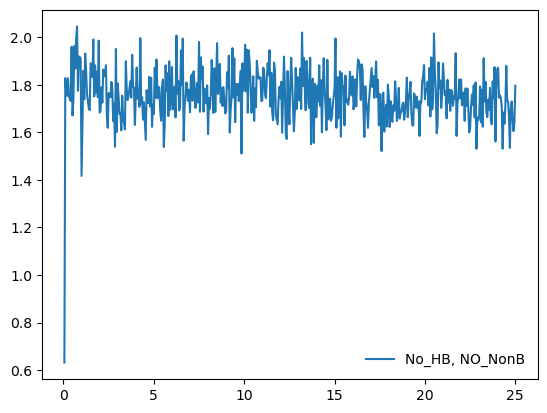

In [35]:
from matplotlib import pyplot as plt
import numpy as np

charmmcpu=np.loadtxt('/home/yumzhang/openmm/inp/charmm_cpu.nohb.totE.dat')[0:500]
openmmcpu=np.loadtxt('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat',skiprows=1,delimiter=',')
time=openmmcpu[:,0]
print(openmmcpu[0:1,1]-charmmcpu[0:1,1])
# differences between OPenMM_HyRes and Local_HyRes E
plt.plot(time,openmmcpu[:,1]-charmmcpu[:,1],label='No_HB, NO_NonB')
plt.legend(frameon=False)

#### Adding HBond Comparision

Turn on HB

In [40]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)



#==========
# we will have three particles: d1(N), d2(NH), a1 (O)
#==========
print('Custom Forces (Hydrogen bonding)...')


## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
Hforce_exp  = "epsilon*(5*(sigma/r)^12-6*(sigma/r)^10)*(cosd^4);"
Hforce_exp += "r=distance(a1,d1);"
#Don't change angle to degree!
Hforce_exp += "cosd=cos(angle(a1,d1,d2))"

#Hforce_exp += "epsilon=sqrt(epsilonA*epsilonD);"
#Hforce_exp += "sigma=0.5*(sigmaD+sigmaA)"
print('Input Algebraic: ', Hforce_exp)

## CustomHbondForce
cus_Hforce = mm.CustomHbondForce(Hforce_exp)

## Note that in HyRes_Hbond expression, sigma and epsilion is global parameter rather than Donor/Accepter specific!
#  Therefore, we really don't need to set epsilonH/sigmaH to be Donor/acceptor based...

cus_Hforce.addGlobalParameter("epsilon",1.5*unit.kilocalorie_per_mole)
cus_Hforce.addGlobalParameter("sigma",2.9*unit.angstrom)

#cus_Hforce.addPerDonorParameter("epsilonD") #,-1.5*unit.kilocalories_per_mole)
#cus_Hforce.addPerDonorParameter("sigmaD") #,2.9*unit.angstrom)


# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
#print(len(atom_selN))
#atom_selN=atom_selN[1:-1,]
#print(len(atom_selN))
atom_selNH=top.topology.select("name H")
atom_selO=top.topology.select("name O")
print("selected_Atom to add HForce is: ",atom_selN,atom_selNH,atom_selO)

# like add a switch function here: 
for Ninx in atom_selN:
    ### hbond list: N, NH, O --- 0, 1, 2
    a2=Ninx-2
    a1=Ninx-1
    d1=Ninx+1
    d2=Ninx
    #print(a2,a1,d1,d2)
    ### d1, d2, d3 and a1, a2, a3 requirs 3 parameter! so... if not three, need to be -1!
    cus_Hforce.addDonor(d1,d2,-1)
    cus_Hforce.addAcceptor(a1,a2,-1)

print("After sum(loop), add HBond to the systems...")
system.addForce(cus_Hforce)


# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

state = simulation.context.getState(getEnergy=True)
energy = state.getPotentialEnergy() / unit.kilocalories_per_mole

print("potential energy (kcal/mol)", energy)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

#simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
#simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))
#simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb.xml')
##simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
#simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.sta')
#simulation.reporters.append(StateDataReporter(stdout, 1, step=True,
#        potentialEnergy=True, temperature=True))
##'/home/yumzhang/openmm/inp/openmm.hb.totE.dat'
#print('# NVE simulation')
#simulation.step(1)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (Hydrogen bonding)...
Input Algebraic:  epsilon*(5*(sigma/r)^12-6*(sigma/r)^10)*(cosd^4);r=distance(a1,d1);cosd=cos(angle(a1,d1,d2))


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

selected_Atom to add HForce is:  [ 3  9 15 21 27 33 39 45 51 57 63 69 75 81 87 93] [ 4 10 16 22 28 34 40 46 52 58 64 70 76 82 88 94] [ 2  8 14 20 26 32 38 44 50 56 62 68 74 80 86 92]
After sum(loop), add HBond to the systems...
potential energy (kcal/mol) 1701.217738893702


**Conclusion**

The simple algrithm logic is correct.

The energy between the simple OPenMM_inp and Local_HyRes inp is big. 

Potential reasons:

1. Cutoff 

The simple OpenMM case does not have cutoff algrithm, but CHARMM has. This can contributes a lot to energy differences.

2. Unit check. 

i.e., energy (kj/mol vs. kcal/mol), angle, bond (Ang vs. nm)... 

The default units for OPenMM and CHARMM may be different.



In [43]:
Hforce_exp  = 'epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; '+ \
'swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*'+ \
'roff2*roff2*(roff2-3.0*ron2)/roffon2^3; '+ \
'roff2 = rcutoff*rcutoff-r*r; '+ \
'ron2 = rcuton*rcuton-r*r; '+ \
'roffon2 = rcutoff*rcutoff-rcuton*rcuton; '+ \
'rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); '+ \
'swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*'+ \
'cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; '+ \
'cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; '+ \
'cosdon2 = cosdcuton*cosdcuton-cosd*cosd; '+ \
'cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; '+ \
'cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); '+ \
'sigma = 0.5*(sigmaD+sigmaA); '+ \
'epsilon = sqrt(epsilonD*epsilonA);'


print(Hforce_exp)

epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*roff2*roff2*(roff2-3.0*ron2)/roffon2^3; roff2 = rcutoff*rcutoff-r*r; ron2 = rcuton*rcuton-r*r; roffon2 = rcutoff*rcutoff-rcuton*rcuton; rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; cosdon2 = cosdcuton*cosdcuton-cosd*cosd; cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); sigma = 0.5*(sigmaD+sigmaA); epsilon = sqrt(epsilonD*epsilonA);


Problems Yumeng met:

1. Energy NaN

first check: found that donor/acceptor were triplly added

2. Particle Position is Nan.

Can add platform to solve this problem!

3. Energy is NaN (again)

Checked Units, should be right!

Find it! we should not change radius to degree!! ... though... why? 

### HyRes NonBonded Input

**Procedure**

1. Specify the biased potential (Formule) --- Exact same as we expected

2. Specify the useful customerForce styles. i.e., CustomNonbondedForce

3. Remove the orginal Nonbonded Function 

4. Global Param and Particle Param. See how to implement them or use them. (found those functions from those customforce)

5. Verification (NVE). Remove (openmm) 
    
   4.1. Energy and Force verification. ForceReporter, EnergyReporter
   
   4.2. NVE dynamic
   
(We may not need switch function)

Reference: @ ~ping/Pikes

/home/ping/programs/charmm/build/hyres/omm_switching.F90

/home/ping/programs/charmm/build/hyres/omm_hbond.F90

**Nonbonded_Function**

$U_{elec} = \sum_{ij}\frac{q_iq_j}{4\pi\epsilon_r\epsilon_0r_{ij}}e^{-\frac{r_{ij}}{D}} sw(r_{ij}, r_{off}, r_{on})$, (3)

where $q_i$ is the charge of the CG bead i, $r_{ij}$ is the inter-charge distance, and $\epsilon_0$ is the permittivity
of vacuum. $D$ is the Debye screening length. At 300 K, $D$ (in Å) depends on the ionic strength ($I$,
in M) according to $\sqrt{9.48/I}$. The $\epsilon_r$ is the effective dielectric constant, and a final value, $\epsilon_r = 20$, was chosen in the HyRes model to capture the solvent effect.


#### No_Nonbonded_Comparision

https://github.com/openmm/openmm/issues/2124

Ways to remove force: 

1. Set sigma to 0, so that when we call on non-bonded, they will calculate to 0

2. Save the system to xml, then we no longer need to read in charmm toppar files. We can change the xml file directly.

3. Directly remove forces. i.e., 

** Example from Xiping**

```
## we can find the specific force kinds, like non-bonded, then, 
either: force = force(nonbonded), remove
or: len(forces['nonbonded'])
## need to check to verify

with open(pdbid+'.solv.systemEtot.xml','r') as f:
    systemEvac = omm.XmlSerializer.deserialize(f.read())
forces = systemEvac.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    systemEvac.removeForce(0)
```

**Attention**

Only for nonbonded, not include HBond.

#### Original Standard MD

In [61]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa-0.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)




# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.sta')
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))
#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))

print('# NVE simulation')
simulation.step(1000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

# NVE simulation
#"Time (ps)","Total Energy (kilocalorie/mole)"
0.05000000000000004,66.82125539260686
0.10000000000000007,66.81129003538399
0.1500000000000001,66.80168022880648
0.20000000000000015,66.77612608626313
0.25000000000000017,66.7835370322287
0.3000000000000002,66.7767064150843
0.35000000000000026,66.77598150778226
0.4000000000000003,66.7878599288957
0.45000000000000034,66.78788436019799
0.5000000000000003,66.776597072828


#### Remove Orig_NB and add New_NB force from standard MD
%pwd

In [59]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa-nb.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

with open('system-orig.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# obtain the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        #print('removed NonbondedForce')
        #system.removeForce(k)
        nb = forces[k]
print('current forces are:', system.getForces())

with open('system-ori.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

    
# Get the exclusive pairs:
#top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
#atom_sel=top.topology.select("all")
npairs = nb.getNumExceptions()
print('npairs = ', npairs)
param0=[0,0]
for inx in range(0,npairs):
    params = nb.getExceptionParameters(inx)
    params = params[0:2]
    #print('params is',params)
    param0 = np.vstack((param0,params))

bond_list=param0[1:]
print(bond_list.shape)


    
# add the elec+vdw customNonbonded force
formula = '(step(Ron - r) + '+ \
'(step(r - Ron) * step(Roff - r) - '+ \
'step(r - Ron) * step(Ron - r)) * '+ \
'(((Roff2 - r2)^2 * (Roff2 + 2.0 * r2 - 3.0 * Ron2)) / '+ \
'(Roff2 - Ron2)^3)) * '+ \
'(4.0 * epsilon * six * (six - 1.0) + (138.935456 / eps * charge1 * charge2) / r * exp(-kf * r));'+ \
'six = (sigma / r)^6; '+ \
'sigma = 0.5 * (sigma1 + sigma2); '+ \
'epsilon = sqrt(epsilon1 * epsilon2);'+ \
'Ron2 = Ron * Ron; Roff2 = Roff * Roff; r2 = r * r; '
# create a custom nonbonded force
force = mm.CustomNonbondedForce(formula)

# global variables: eps, Ron, Roff, kf,
force.addGlobalParameter('eps', 20)
force.addGlobalParameter('Ron', 1.6*unit.nanometer)
force.addGlobalParameter('Roff', 1.8*unit.nanometer)
IONC = 0 #0.15
force.addGlobalParameter('kf', np.sqrt(IONC/9.480)*mm.AngstromsPerNm)

# perparticle variables: sigma, epsilon, charge,
force.addPerParticleParameter('epsilon')
force.addPerParticleParameter('charge')
force.addPerParticleParameter('sigma')

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("all")
for inx in atom_sel:
    q1, sig1, eps1 = nb.getParticleParameters(inx)
    print(inx, q1, sig1, eps1)
    force.addParticle([eps1,q1,sig1])
for pairs in range(len(bond_list)):
    pair=bond_list[pairs]
    force.addExclusion(pair[0],pair[1])
system.addForce(force)

with open('system-addcustomNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# delete the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        print('removed NonbondedForce')
        system.removeForce(k)
print('current forces are:', system.getForces())

with open('system-addcustomNB-rmNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))

#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.sta')
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))
#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))

print('# NVE simulation')
simulation.step(1000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
current forces are: [<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7f19e4f77960> >, <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7f19e4f77a50> >, <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x7f19e4f779c0> >, <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x7f19e4f77900> >, <openmm.openmm.CMAPTorsionForce; proxy of <Swig Object of type 'OpenMM::CMAPTorsionForce *' at 0x7f19e4f77870> >, <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f19e4f777e0> >, <openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f19e4f77750> >]
npairs =  420
(420, 2)
0 0.0 e 0.0 nm 0.0 kJ/mol
1 0.0 e 0.37417746161894255 nm 0.150624 

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:991: UserWarning: Patch NTER not found
  warnings.warn('Patch %s not found' % patch_name)
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:998: UserWarning: Patch CTER not found
  warnings.warn('Patch %s not found' % patch_name)
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.0

# NVE simulation
#"Time (ps)","Total Energy (kilocalorie/mole)"
0.05000000000000004,63.54680686946922
0.10000000000000007,63.538550728679155
0.1500000000000001,63.52454086900982
0.20000000000000015,63.49847300145525
0.25000000000000017,63.50486891110023
0.3000000000000002,63.49453530016125
0.35000000000000026,63.49272533706309
0.4000000000000003,63.50918439257868
0.45000000000000034,63.50151601917044
0.5000000000000003,63.5039720390024


## Conclusions:

    |CHARMM|OPenMM
===================
|Full|45.47 |52.43
|NB  |56.69 |63.54
|0   |66.79 |66.82

Note: Not consistent, Non-bonded term in OpenMM implement has something wrong!

### HyRes Force Field

#### Add the Custom all Hyres forces

Including electrostatic and HBond forces.

New: HBond.

In [32]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# 1) import the original force field
# ------------------
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

with open('system-orig.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# obtain the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        #print('removed NonbondedForce')
        #system.removeForce(k)
        nb = forces[k]
print('current forces are:', system.getForces())

with open('system-ori.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# 2) add the Custom Nonbonded force
# ---------------------
    
# Get the exclusive pairs:
#top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
#atom_sel=top.topology.select("all")
npairs = nb.getNumExceptions()
print('npairs = ', npairs)
param0=[0,0]
for inx in range(0,npairs):
    params = nb.getExceptionParameters(inx)
    params = params[0:2]
    #print('params is',params)
    param0 = np.vstack((param0,params))

bond_list=param0[1:]
print(bond_list.shape)


    
# add the elec+vdw customNonbonded force - copied from session 'Remove Orig_NB and add New_NB force from standard MD'
formula = '(step(Ron - r) + '+ \
'(step(r - Ron) * step(Roff - r) - '+ \
'step(r - Ron) * step(Ron - r)) * '+ \
'(((Roff2 - r2)^2 * (Roff2 + 2.0 * r2 - 3.0 * Ron2)) / '+ \
'(Roff2 - Ron2)^3)) * '+ \
'(4.0 * epsilon * six * (six - 1.0) + (138.935456 / eps * charge1 * charge2) / r * exp(-kf * r));'+ \
'six = (sigma / r)^6; '+ \
'sigma = 0.5 * (sigma1 + sigma2); '+ \
'epsilon = sqrt(epsilon1 * epsilon2);'+ \
'Ron2 = Ron * Ron; Roff2 = Roff * Roff; r2 = r * r; '
# create a custom nonbonded force
force = mm.CustomNonbondedForce(formula)

# global variables: eps, Ron, Roff, kf,
force.addGlobalParameter('eps', 20)
force.addGlobalParameter('Ron', 1.6*unit.nanometer)
force.addGlobalParameter('Roff', 1.8*unit.nanometer)
IONC = 0 #0.15
force.addGlobalParameter('kf', np.sqrt(IONC/9.480)*mm.AngstromsPerNm)

# perparticle variables: sigma, epsilon, charge,
force.addPerParticleParameter('epsilon')
force.addPerParticleParameter('charge')
force.addPerParticleParameter('sigma')

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("all")
for inx in atom_sel:
    q1, sig1, eps1 = nb.getParticleParameters(inx)
    #print(inx, q1, sig1, eps1)
    force.addParticle([eps1,q1,sig1])
for pairs in range(len(bond_list)):
    pair=bond_list[pairs]
    force.addExclusion(pair[0],pair[1])
system.addForce(force)

with open('system-addcustomNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# delete the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        print('removed NonbondedForce')
        system.removeForce(k)
print('current forces are:', system.getForces())

with open('system-addcustomNB-rmNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

    
    
# Add the Custom H-B force
# ----------------
print('Adding Custom H-B force')
## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
formula  = 'epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; '+ \
'swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*'+ \
'roff2*roff2*(roff2-3.0*ron2)/roffon2^3; '+ \
'roff2 = rcutoff*rcutoff-r*r; '+ \
'ron2 = rcuton*rcuton-r*r; '+ \
'roffon2 = rcutoff*rcutoff-rcuton*rcuton; '+ \
'rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); '+ \
'swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*'+ \
'cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; '+ \
'cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; '+ \
'cosdon2 = cosdcuton*cosdcuton-cosd*cosd; '+ \
'cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; '+ \
'cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); '+ \
'sigma = 0.5*(sigmaD+sigmaA); '+ \
'epsilon = sqrt(epsilonD*epsilonA);'

# global parameters
Hforce = mm.CustomHbondForce(formula)

# global variables: eps, Ron, Roff, kf,
Hforce.addGlobalParameter('CTOFHB', 5.0*unit.angstrom)
Hforce.addGlobalParameter('CTONHB', 4.0*unit.angstrom)
Hforce.addGlobalParameter('CTOFHA', 91*unit.degree)
Hforce.addGlobalParameter('CTONHA', 90*unit.degree)

# -----
# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
IDON = top.topology.select("name N")
IHD1 = top.topology.select("name H")
IACC = top.topology.select("name O")
IAC1 = top.topology.select("name C")
NDON = len(IDON)
NACC = len(IACC)
CHBA = 2653610.8740410185
CHBB = 378636.50997018098
#for k in range(0,NDON):
#    print(IDON[k], IHD1[k])
#for k in range(0, NACC):
#    print(IACC[k], IAC1[k])

# inputs: 
# NDON, IDON, IHD1
# NACC, IACC, IAC1
# CHBA, CHBB

# perparticle variables: sigma, epsilon, charge,
Hforce.addPerDonorParameter("epsilonD") 
Hforce.addPerDonorParameter("sigmaD")
params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NDON):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addDonor(IDON[inx],IHD1[inx],-1, [eps, sigma])

Hforce.addPerAcceptorParameter("epsilonA") 
Hforce.addPerAcceptorParameter("sigmaA")

params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NACC):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addAcceptor(IACC[inx],IAC1[inx],-1, [eps, sigma])

system.addForce(Hforce)

# Run the NVE simulation
# ----------------------
    
# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))

#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.openmm.sta')
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False,totalEnergy=True))
simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.totE.1gpu.dat', 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False,totalEnergy=True))

print('# NVE simulation')
simulation.step(50000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
current forces are: [<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7efdae854480> >, <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7efdae3a0600> >, <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x7efd6b74a150> >, <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x7efd6b74a630> >, <openmm.openmm.CMAPTorsionForce; proxy of <Swig Object of type 'OpenMM::CMAPTorsionForce *' at 0x7efd6b74a5d0> >, <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7efd6b74a660> >, <openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7efd6b74a6f0> >]
npairs =  420
(420, 2)
removed NonbondedForce
current forces are: [<openmm.openmm.Harmoni

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

# NVE simulation
#"Time (ps)","Total Energy (kilocalorie/mole)"
0.05000000000000004,52.429701963770796
0.10000000000000007,52.41976051687496
0.1500000000000001,52.41427429547501
0.20000000000000015,52.39068760214298
0.25000000000000017,52.39472246994166
0.3000000000000002,52.386771588377925
0.35000000000000026,52.38203995506747
0.4000000000000003,52.389748321256704
0.45000000000000034,52.39621300008112
0.5000000000000003,52.39317908769128
0.5499999999999948,52.393753992849476
0.5999999999999893,52.397345287999556
0.6499999999999838,52.396880022034644
0.6999999999999783,52.398309806080434
0.7499999999999728,52.41046234587809
0.7999999999999673,52.40693645031827
0.8499999999999618,52.399868400229664
0.8999999999999563,52.40321044950794
0.9499999999999508,52.391988958052245
0.9999999999999453,52.398824177497204
1.0499999999999399,52.40169023034513
1.0999999999999344,52.39929148223274
1.1499999999999289,52.40973337316604
1.1999999999999234,52.40147079681233
1.2499999999999178,52.3990970630

#### Testing Implementation (Energy and Forces)

1. Energy and atomic forces of one configuration

2. NVE energy test, to see whether the energy can be conserved or not.


In [ ]:
## Force comparisions

In [57]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np

## print forces
#def report(self, simulation, state):
#        forces = state.getForces().value_in_unit(u.kilojoules/u.mole/u.nanometer)
#        for f in forces:
#            self._out.write('%g %g %g\n' % (f[0], f[1], f[2]))  
            
            
# 1) import the original force field
# ------------------
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', 
                            '/home/yumzhang/openmm/inp/param-idpcg-sasa-hb.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

with open('system-orig.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# obtain the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        #print('removed NonbondedForce')
        #system.removeForce(k)
        nb = forces[k]
print('current forces are:', system.getForces())

with open('system-ori.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# 2) add the Custom Nonbonded force
# ---------------------
    
# Get the exclusive pairs:
#top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
#atom_sel=top.topology.select("all")
npairs = nb.getNumExceptions()
print('npairs = ', npairs)
param0=[0,0]
for inx in range(0,npairs):
    params = nb.getExceptionParameters(inx)
    params = params[0:2]
    #print('params is',params)
    param0 = np.vstack((param0,params))

bond_list=param0[1:]
print(bond_list.shape)


    
# add the elec+vdw customNonbonded force - copied from session 'Remove Orig_NB and add New_NB force from standard MD'
formula = '(step(Ron - r) + '+ \
'(step(r - Ron) * step(Roff - r) - '+ \
'step(r - Ron) * step(Ron - r)) * '+ \
'(((Roff2 - r2)^2 * (Roff2 + 2.0 * r2 - 3.0 * Ron2)) / '+ \
'(Roff2 - Ron2)^3)) * '+ \
'(4.0 * epsilon * six * (six - 1.0) + (138.935456 / eps * charge1 * charge2) / r * exp(-kf * r));'+ \
'six = (sigma / r)^6; '+ \
'sigma = 0.5 * (sigma1 + sigma2); '+ \
'epsilon = sqrt(epsilon1 * epsilon2);'+ \
'Ron2 = Ron * Ron; Roff2 = Roff * Roff; r2 = r * r; '
# create a custom nonbonded force
force = mm.CustomNonbondedForce(formula)

# global variables: eps, Ron, Roff, kf,
force.addGlobalParameter('eps', 20)
force.addGlobalParameter('Ron', 1.6*unit.nanometer)
force.addGlobalParameter('Roff', 1.8*unit.nanometer)
IONC = 0 #0.15
force.addGlobalParameter('kf', np.sqrt(IONC/9.480)*mm.AngstromsPerNm)

# perparticle variables: sigma, epsilon, charge,
force.addPerParticleParameter('epsilon')
force.addPerParticleParameter('charge')
force.addPerParticleParameter('sigma')

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("all")
for inx in atom_sel:
    q1, sig1, eps1 = nb.getParticleParameters(inx)
    #print(inx, q1, sig1, eps1)
    force.addParticle([eps1,q1,sig1])
for pairs in range(len(bond_list)):
    pair=bond_list[pairs]
    force.addExclusion(pair[0],pair[1])
system.addForce(force)

with open('system-addcustomNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# delete the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        print('removed NonbondedForce')
        system.removeForce(k)
print('current forces are:', system.getForces())

with open('system-addcustomNB-rmNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

    
    
# Add the Custom H-B force
# ----------------
print('Adding Custom H-B force')
## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
formula  = 'epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; '+ \
'swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*'+ \
'roff2*roff2*(roff2-3.0*ron2)/roffon2^3; '+ \
'roff2 = rcutoff*rcutoff-r*r; '+ \
'ron2 = rcuton*rcuton-r*r; '+ \
'roffon2 = rcutoff*rcutoff-rcuton*rcuton; '+ \
'rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); '+ \
'swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*'+ \
'cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; '+ \
'cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; '+ \
'cosdon2 = cosdcuton*cosdcuton-cosd*cosd; '+ \
'cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; '+ \
'cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); '+ \
'sigma = 0.5*(sigmaD+sigmaA); '+ \
'epsilon = sqrt(epsilonD*epsilonA);'

# global parameters
Hforce = mm.CustomHbondForce(formula)

# global variables: eps, Ron, Roff, kf,
Hforce.addGlobalParameter('CTOFHB', 5.0*unit.angstrom)
Hforce.addGlobalParameter('CTONHB', 4.0*unit.angstrom)
Hforce.addGlobalParameter('CTOFHA', 91*unit.degree)
Hforce.addGlobalParameter('CTONHA', 90*unit.degree)

# -----
# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
IDON = top.topology.select("name N")
IHD1 = top.topology.select("name H")
IACC = top.topology.select("name O")
IAC1 = top.topology.select("name C")
NDON = len(IDON)
NACC = len(IACC)
CHBA = 2653610.8740410185
CHBB = 378636.50997018098
#for k in range(0,NDON):
#    print(IDON[k], IHD1[k])
#for k in range(0, NACC):
#    print(IACC[k], IAC1[k])

# inputs: 
# NDON, IDON, IHD1
# NACC, IACC, IAC1
# CHBA, CHBB

# perparticle variables: sigma, epsilon, charge,
Hforce.addPerDonorParameter("epsilonD") 
Hforce.addPerDonorParameter("sigmaD")
params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NDON):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addDonor(IDON[inx],IHD1[inx],-1, [eps, sigma])

Hforce.addPerAcceptorParameter("epsilonA") 
Hforce.addPerAcceptorParameter("sigmaA")

params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NACC):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addAcceptor(IACC[inx],IAC1[inx],-1, [eps, sigma])

system.addForce(Hforce)



# Run the NVE simulation
# ----------------------
    
# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.002*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)
simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.fgpu.hr.pdb',1))
state = simulation.context.getState(getEnergy=True,getForces=True)

# print energy and forces of current configration
energy = state.getPotentialEnergy() / u.kilocalories_per_mole
print('Energy (kcal/mol) : ', energy)

forces = state.getForces().value_in_unit(u.kilocalorie_per_mole/u.angstrom)
atminx = 0
for f in forces:
    print(atminx, f[0], f[1], f[2])
    atminx += 1
    
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/forces_1gpu.txt',1))

#simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.fgpu.hr.pdb',1))
#simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.fgpu.hr.dcd', 1))

#simulation.reporters.append(stateReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
#simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb_fgpu-nve.force.openmm.sta')
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/forces_1gpu.txt',1))
#simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
#        potentialEnergy=False,temperature=False,kineticEnergy=False,forceList=True))
#simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.totE.1gpu.dat', 100, step=False,
#        potentialEnergy=False,temperature=False,kineticEnergy=False,totalEnergy=True))

#print('# Force Calculation')
#simulation.step(1)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
current forces are: [<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7f19e7279030> >, <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7f19e7a41ea0> >, <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x7f19e7a41ab0> >, <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x7f19e7a41a20> >, <openmm.openmm.CMAPTorsionForce; proxy of <Swig Object of type 'OpenMM::CMAPTorsionForce *' at 0x7f19e7a41960> >, <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f19e7a418d0> >, <openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f19e7a41840> >]
npairs =  420
(420, 2)
removed NonbondedForce
current forces are: [<openmm.openmm.Harmoni

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

Energy (kcal/mol) :  52.32808785958226
0 9.447089025668843 -0.8753400003932857 -2.158215670467107
1 -42.96280694965195 12.8349085382932 -6.654746673759037
2 33.79430242067997 -12.295737913872042 5.8575810711424845
3 21.492245092446673 29.09604832957397 1.8250952259304418
4 3.6229919521120264 1.2029667885308055 2.9764038654859846
5 -56.1717863064651 -42.928458627733626 5.974468719890878
6 27.315957414032624 -2.381735595644774 0.6790158853476179
7 18.611565146801805 21.545186963637516 7.274623309221139
8 -5.162015882094549 -9.770535966862228 -15.432142618737302
9 -32.82026651940428 22.076818637592613 -37.01313667953812
10 3.9545004500029877 -1.3616202666244361 -7.007128421936619
11 19.44488175284566 -41.697999213895194 19.105455387618754
12 9.180658314925534 -2.2640720608129556 14.885784608684123
13 -12.389760354736795 51.366568979296126 16.401220142955307
14 -18.910713268739542 -9.452095542309618 0.9901851814518011
15 36.58514661041318 -12.346355956097634 -10.378299662077632
16 -12.8510

In [42]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# 1) import the original force field
# ------------------
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

with open('system-orig.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# obtain the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        #print('removed NonbondedForce')
        #system.removeForce(k)
        nb = forces[k]
print('current forces are:', system.getForces())

with open('system-ori.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# 2) add the Custom Nonbonded force
# ---------------------
    
# Get the exclusive pairs:
#top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
#atom_sel=top.topology.select("all")
npairs = nb.getNumExceptions()
print('npairs = ', npairs)
param0=[0,0]
for inx in range(0,npairs):
    params = nb.getExceptionParameters(inx)
    params = params[0:2]
    #print('params is',params)
    param0 = np.vstack((param0,params))

bond_list=param0[1:]
print(bond_list.shape)


    
# add the elec+vdw customNonbonded force - copied from session 'Remove Orig_NB and add New_NB force from standard MD'
formula = '(step(Ron - r) + '+ \
'(step(r - Ron) * step(Roff - r) - '+ \
'step(r - Ron) * step(Ron - r)) * '+ \
'(((Roff2 - r2)^2 * (Roff2 + 2.0 * r2 - 3.0 * Ron2)) / '+ \
'(Roff2 - Ron2)^3)) * '+ \
'(4.0 * epsilon * six * (six - 1.0) + (138.935456 / eps * charge1 * charge2) / r * exp(-kf * r));'+ \
'six = (sigma / r)^6; '+ \
'sigma = 0.5 * (sigma1 + sigma2); '+ \
'epsilon = sqrt(epsilon1 * epsilon2);'+ \
'Ron2 = Ron * Ron; Roff2 = Roff * Roff; r2 = r * r; '
# create a custom nonbonded force
force = mm.CustomNonbondedForce(formula)

# global variables: eps, Ron, Roff, kf,
force.addGlobalParameter('eps', 20)
force.addGlobalParameter('Ron', 1.6*unit.nanometer)
force.addGlobalParameter('Roff', 1.8*unit.nanometer)
IONC = 0 #0.15
force.addGlobalParameter('kf', np.sqrt(IONC/9.480)*mm.AngstromsPerNm)

# perparticle variables: sigma, epsilon, charge,
force.addPerParticleParameter('epsilon')
force.addPerParticleParameter('charge')
force.addPerParticleParameter('sigma')

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("all")
for inx in atom_sel:
    q1, sig1, eps1 = nb.getParticleParameters(inx)
    #print(inx, q1, sig1, eps1)
    force.addParticle([eps1,q1,sig1])
for pairs in range(len(bond_list)):
    pair=bond_list[pairs]
    force.addExclusion(pair[0],pair[1])
system.addForce(force)

with open('system-addcustomNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# delete the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        print('removed NonbondedForce')
        system.removeForce(k)
print('current forces are:', system.getForces())

with open('system-addcustomNB-rmNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

    
    
# Add the Custom H-B force
# ----------------
print('Adding Custom H-B force')
## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
formula  = 'epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; '+ \
'swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*'+ \
'roff2*roff2*(roff2-3.0*ron2)/roffon2^3; '+ \
'roff2 = rcutoff*rcutoff-r*r; '+ \
'ron2 = rcuton*rcuton-r*r; '+ \
'roffon2 = rcutoff*rcutoff-rcuton*rcuton; '+ \
'rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); '+ \
'swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*'+ \
'cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; '+ \
'cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; '+ \
'cosdon2 = cosdcuton*cosdcuton-cosd*cosd; '+ \
'cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; '+ \
'cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); '+ \
'sigma = 0.5*(sigmaD+sigmaA); '+ \
'epsilon = sqrt(epsilonD*epsilonA);'

# global parameters
Hforce = mm.CustomHbondForce(formula)

# global variables: eps, Ron, Roff, kf,
Hforce.addGlobalParameter('CTOFHB', 5.0*unit.angstrom)
Hforce.addGlobalParameter('CTONHB', 4.0*unit.angstrom)
Hforce.addGlobalParameter('CTOFHA', 91*unit.degree)
Hforce.addGlobalParameter('CTONHA', 90*unit.degree)

# -----
# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
IDON = top.topology.select("name N")
IHD1 = top.topology.select("name H")
IACC = top.topology.select("name O")
IAC1 = top.topology.select("name C")
NDON = len(IDON)
NACC = len(IACC)
CHBA = 2653610.8740410185
CHBB = 378636.50997018098
#for k in range(0,NDON):
#    print(IDON[k], IHD1[k])
#for k in range(0, NACC):
#    print(IACC[k], IAC1[k])

# inputs: 
# NDON, IDON, IHD1
# NACC, IACC, IAC1
# CHBA, CHBB

# perparticle variables: sigma, epsilon, charge,
Hforce.addPerDonorParameter("epsilonD") 
Hforce.addPerDonorParameter("sigmaD")
params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NDON):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addDonor(IDON[inx],IHD1[inx],-1, [eps, sigma])

Hforce.addPerAcceptorParameter("epsilonA") 
Hforce.addPerAcceptorParameter("sigmaA")

params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NACC):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addAcceptor(IACC[inx],IAC1[inx],-1, [eps, sigma])

system.addForce(Hforce)

# Run the NVE simulation
# ----------------------
    
# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms, no specify: CPU
#plat = mm.Platform.getPlatformByName('OpenCL')
#prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))

#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.openmm.sta')
simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.totE.1cpu.dat', 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False,totalEnergy=True))

print('# NVE simulation')
simulation.step(500000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
current forces are: [<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7f19ec0e5ed0> >, <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7f19ec5c79f0> >, <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x7f19e8fa2540> >, <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x7f19e8fa2600> >, <openmm.openmm.CMAPTorsionForce; proxy of <Swig Object of type 'OpenMM::CMAPTorsionForce *' at 0x7f19e8fa24e0> >, <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f19e8fa2390> >, <openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f19e8fa2180> >]
npairs =  420
(420, 2)
removed NonbondedForce
current forces are: [<openmm.openmm.Harmoni

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

# NVE simulation


In [41]:
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np


# 1) import the original force field
# ------------------
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')
# Key points: System created based on PSF. 
## Let's not turn on non-bonded Force totally!
system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)

with open('system-orig.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# obtain the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        #print('removed NonbondedForce')
        #system.removeForce(k)
        nb = forces[k]
print('current forces are:', system.getForces())

with open('system-ori.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

# 2) add the Custom Nonbonded force
# ---------------------
    
# Get the exclusive pairs:
#top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
#atom_sel=top.topology.select("all")
npairs = nb.getNumExceptions()
print('npairs = ', npairs)
param0=[0,0]
for inx in range(0,npairs):
    params = nb.getExceptionParameters(inx)
    params = params[0:2]
    #print('params is',params)
    param0 = np.vstack((param0,params))

bond_list=param0[1:]
print(bond_list.shape)


    
# add the elec+vdw customNonbonded force - copied from session 'Remove Orig_NB and add New_NB force from standard MD'
formula = '(step(Ron - r) + '+ \
'(step(r - Ron) * step(Roff - r) - '+ \
'step(r - Ron) * step(Ron - r)) * '+ \
'(((Roff2 - r2)^2 * (Roff2 + 2.0 * r2 - 3.0 * Ron2)) / '+ \
'(Roff2 - Ron2)^3)) * '+ \
'(4.0 * epsilon * six * (six - 1.0) + (138.935456 / eps * charge1 * charge2) / r * exp(-kf * r));'+ \
'six = (sigma / r)^6; '+ \
'sigma = 0.5 * (sigma1 + sigma2); '+ \
'epsilon = sqrt(epsilon1 * epsilon2);'+ \
'Ron2 = Ron * Ron; Roff2 = Roff * Roff; r2 = r * r; '
# create a custom nonbonded force
force = mm.CustomNonbondedForce(formula)

# global variables: eps, Ron, Roff, kf,
force.addGlobalParameter('eps', 20)
force.addGlobalParameter('Ron', 1.6*unit.nanometer)
force.addGlobalParameter('Roff', 1.8*unit.nanometer)
IONC = 0 #0.15
force.addGlobalParameter('kf', np.sqrt(IONC/9.480)*mm.AngstromsPerNm)

# perparticle variables: sigma, epsilon, charge,
force.addPerParticleParameter('epsilon')
force.addPerParticleParameter('charge')
force.addPerParticleParameter('sigma')

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
# select CA
atom_sel=top.topology.select("all")
for inx in atom_sel:
    q1, sig1, eps1 = nb.getParticleParameters(inx)
    #print(inx, q1, sig1, eps1)
    force.addParticle([eps1,q1,sig1])
for pairs in range(len(bond_list)):
    pair=bond_list[pairs]
    force.addExclusion(pair[0],pair[1])
system.addForce(force)

with open('system-addcustomNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))
    
# delete the Nonbonded forces
forces = system.getForces()
for k in range(0,len(forces)):
    # once the force is removed, then force indeices will be reduced by one
    if forces[k].getName() == 'NonbondedForce':
        print('removed NonbondedForce')
        system.removeForce(k)
print('current forces are:', system.getForces())

with open('system-addcustomNB-rmNB.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

    
    
# Add the Custom H-B force
# ----------------
print('Adding Custom H-B force')
## Algebraic
# a1: O, d1: H, d2: N, a2: C
# dist: O-H or O-N?
formula  = 'epsilon*(5.0*(sigma/r)^12-6.0*(sigma/r)^10)*swrad*cosd^4*swang; '+ \
'swrad = step(rcuton-r)+step(r-rcuton)*(step(rcutoff-r)-step(rcuton-r))*'+ \
'roff2*roff2*(roff2-3.0*ron2)/roffon2^3; '+ \
'roff2 = rcutoff*rcutoff-r*r; '+ \
'ron2 = rcuton*rcuton-r*r; '+ \
'roffon2 = rcutoff*rcutoff-rcuton*rcuton; '+ \
'rcutoff = CTOFHB; rcuton = CTONHB; r = distance(d1,a1); '+ \
'swang = step(cosdcuton-cosd)+step(cosd-cosdcuton)*(step(cosdcutoff-cosd)-step(cosdcuton-cosd))*'+ \
'cosdoff2*cosdoff2*(cosdoff2-3.0*cosdon2)/cosdoffon2^3; '+ \
'cosdoff2 = cosdcutoff*cosdcutoff-cosd*cosd; '+ \
'cosdon2 = cosdcuton*cosdcuton-cosd*cosd; '+ \
'cosdoffon2 = cosdcutoff*cosdcutoff-cosdcuton*cosdcuton; '+ \
'cosdcutoff = -cos(CTOFHA); cosdcuton = -cos(CTONHA); cosd = cos(angle(d1,d2,a1)); '+ \
'sigma = 0.5*(sigmaD+sigmaA); '+ \
'epsilon = sqrt(epsilonD*epsilonA);'

# global parameters
Hforce = mm.CustomHbondForce(formula)

# global variables: eps, Ron, Roff, kf,
Hforce.addGlobalParameter('CTOFHB', 5.0*unit.angstrom)
Hforce.addGlobalParameter('CTONHB', 4.0*unit.angstrom)
Hforce.addGlobalParameter('CTOFHA', 91*unit.degree)
Hforce.addGlobalParameter('CTONHA', 90*unit.degree)

# -----
# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
IDON = top.topology.select("name N")
IHD1 = top.topology.select("name H")
IACC = top.topology.select("name O")
IAC1 = top.topology.select("name C")
NDON = len(IDON)
NACC = len(IACC)
CHBA = 2653610.8740410185
CHBB = 378636.50997018098
#for k in range(0,NDON):
#    print(IDON[k], IHD1[k])
#for k in range(0, NACC):
#    print(IACC[k], IAC1[k])

# inputs: 
# NDON, IDON, IHD1
# NACC, IACC, IAC1
# CHBA, CHBB

# perparticle variables: sigma, epsilon, charge,
Hforce.addPerDonorParameter("epsilonD") 
Hforce.addPerDonorParameter("sigmaD")
params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NDON):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addDonor(IDON[inx],IHD1[inx],-1, [eps, sigma])

Hforce.addPerAcceptorParameter("epsilonA") 
Hforce.addPerAcceptorParameter("sigmaA")

params = [2.9*unit.angstrom, 1.5*unit.kilocalorie_per_mole]
for inx in range(0,NACC):
    eps = CHBB/6.0*(5.0/6.0*CHBB/CHBA)**5 * mm.KJPerKcal
    sigma = np.sqrt(6.0/5.0*CHBA/CHBB) / mm.AngstromsPerNm
    Hforce.addAcceptor(IACC[inx],IAC1[inx],-1, [eps, sigma])

system.addForce(Hforce)

# Run the NVE simulation
# ----------------------
    
# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms, specify to GPU
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation, specify the CUDA!
simulation = app.Simulation(pdb.topology, system, integrator,plat, prop)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.hr.dcd', 100))

#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_hb-nve.openmm.sta')
simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.totE.1gpu.dat', 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False,totalEnergy=True))

print('# NVE simulation')
simulation.step(500000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
current forces are: [<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x7f1ab0797930> >, <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x7f19e8f42480> >, <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x7f19e8f42de0> >, <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x7f19e8f42ea0> >, <openmm.openmm.CMAPTorsionForce; proxy of <Swig Object of type 'OpenMM::CMAPTorsionForce *' at 0x7f19e8f42f90> >, <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f19e8f42f30> >, <openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f19e8f47540> >]
npairs =  420
(420, 2)
removed NonbondedForce
current forces are: [<openmm.openmm.Harmoni

/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

# NVE simulation


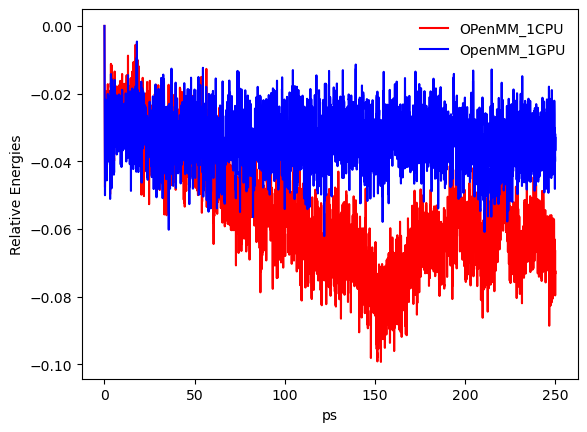

In [43]:
# Energy and forces test 
from matplotlib import pyplot as plt
import numpy as np

omm_cpu=np.loadtxt('/home/yumzhang/openmm/inp/openmm.totE.1cpu.dat',delimiter=',',skiprows=1)
omm_gpu=np.loadtxt('/home/yumzhang/openmm/inp/openmm.totE.1gpu.dat',delimiter=',',skiprows=1)

# same timestep for CHARMM and OPenmm
plt.plot(omm_cpu[:,0],omm_cpu[0:,1]-omm_cpu[0:1,1], label='OPenMM_1CPU',c='r')
plt.plot(omm_gpu[:,0],omm_gpu[0:,1]-omm_gpu[0:1,1], label='OpenMM_1GPU',c='b')

plt.xlabel('ps')
plt.ylabel('Relative Energies')
plt.legend(frameon=False)

Text(0, 0.5, 'Relative Energies')

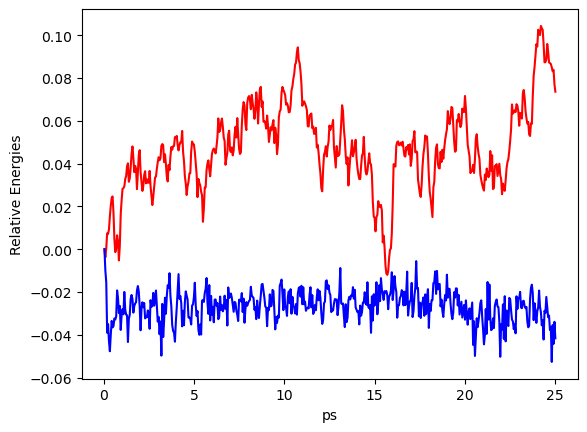

In [30]:
# Energy and forces test to CHARMM
from matplotlib import pyplot as plt
import numpy as np

chm_all=np.loadtxt('/home/yumzhang/openmm/inp/charmm_cpu.all.dat')
omm_all=np.loadtxt('/home/yumzhang/openmm/inp/openmm.totE.dat',delimiter=',')

# same timestep for CHARMM and OPenmm
plt.plot(omm_all[:,0],chm_all[0:]-chm_all[0], label='CHARMM_HyRes',c='r')
plt.plot(omm_all[:,0],omm_all[0:,1]-omm_all[0:1,1], label='OpenMM_HyRes',c='b')

plt.xlabel('ps')
plt.ylabel('Relative Energies')

In [ ]:
# NVE energy conservation


### SASA implementation 

SASA functions:

http://docs.openmm.org/7.6.0/userguide/theory/02_standard_forces.html

The Functions: 

$U_{sasa} = \sum_{i}\sigma_{i}*A_{i}(r)$

---

$A_{i}(r) = S_{i}\prod_{j}[1-p_{i}p_{ij}b_{ij}(r_{ij})/S_{i}]$

If $r_{ij}$ > $R_{i}$ + $R_{j}$ +$2R_{probe}$:

$b_{ij}(r_{ij} = 0$

else:

$b_{ij}(r_{ij}) = \pi(R_{i}+R_{probe})(R_{i} + R_{j} +2R_{probe}-r_{ij})[1+(R_{i}-R{j})r_{ij}^-1]$

$S_{i} = 4\pi(R_{i}+R_{probe})^2$

--------------------------------

$\sigma_{i}$: kcal/mol/A^2

$2R_{probe}$ : 1.4 A

$p_{ij}$ : 0.8875, covalently bond (|i-j|=1)
           0.3516. otherwise!

Notably, in HyRes, only C-O is covalently bonded when we add solvation term.

$p_{i}$: need to check CHARMM inputs.

Maybe: 

C(carbonyl): 1.554

N: 1.028

O: 0.926



-------------------------------

[ref] "Evaluation of a fast implicit solvent model for molecular dynamics simulations." (https://doi.org/10.1002/prot.10001)



**parameters for Charmm_HyRes_SASA**




| |N(31)|NH(38)|C(11)|O(51)|
|---|---|---|---|---|
|Solvation E (SigmaI, Kcal/mol/A^2)|-0.01|-0.01|0.012|-0.01|
|vdW Radius (Ri, A)|1.55|1.55|1.72|1.50|
|Hiting Probability (Pi)|1.028|1.028|1.554|0.926|

bonded:

pij=0.8875

else: 

pij=0.3516


In [99]:
#------------------------------------Import Packages---------------------------------------#
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np

#------------------------------------SASA_Implementation---------------------------------------#
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')

system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)


#==========
# we will have three particle types: N, O, C
#==========
## Algebraic: only variable: rij --- r
## Note that A min function can set the condition: r> R1+R2-2Rprobe ---> 0
## so how about pij, # pij: 0.8875 (covalent, 1.23 C_N, 1.33 C_O) or 0.3516 (otherwise)

print('Custom Forces (SASA implementation)...')

sasa_force_exp  = "sigmaI*Si*AreaI;"
sasa_force_exp += "AreaI=(1-Pi*pij*bij/Si);"
sasa_force_exp += "pij=-535.9/45*[min(abs(r-0.128),0.05)+0.8875+5.359/90];"
sasa_force_exp += "Si=4*pi*(radius1+Rprobe)^2;"
sasa_force_exp += "bij=pi*(radius1+Rprobe)*(radius1+radius2+2*Rprobe-min(r,radius1+radius2+2*Rprobe))*(1+(radius2-radius1)/r);"

print('Input Algebraic: ', sasa_force_exp)

cus_sasaforce = mm.CustomNonbondedForce(sasa_force_exp)

cus_sasaforce.addGlobalParameter("Rprobe",1.4*unit.angstrom)
cus_sasaforce.addPerParticleParameter('radius')
cus_sasaforce.addPerParticleParameter('sigmaI')
cus_sasaforce.addPerParticleParameter('Pi')



# Get reference for all atoms position using mdtraj
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
atom_selC=top.topology.select("name C")
atom_selO=top.topology.select("name O")
print("selected_Atom to add SASA Force is: ",atom_selN,atom_selC,atom_selO)

# like add a switch function here: 
for Ninx in atom_selN:
    radius=1.55*unit.angstrom
    sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
    Pi=1.028
    cus_sasaforce.addParticle(Ninx,[radius,sigmaI,Pi])

for Oinx in atom_selO:
    radius=1.50*unit.angstrom
    sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
    Pi=0.926
    
    cus_sasaforce.addParticle(Oinx,[radius,sigmaI,Pi])
    
for Cinx in atom_selC:
    radius=1.72*unit.angstrom
    sigmaI=0.012*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
    Pi=1.554
    
    cus_sasaforce.addParticle(Cinx,[radius,sigmaI,Pi])


print("After sum(loop), add SASA SolvE to the systems...")
system.addForce(cus_sasaforce)


# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.dcd', 100))
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.sta')
#simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100, step=False,
#        potentialEnergy=False,temperature=False,kineticEnergy=False))
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))

#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))


print('# NVE simulation')
simulation.step(50000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (SASA implementation)...
Input Algebraic:  sigmaI*Si*AreaI;AreaI=(1-Pi*pij*bij/Si);pij=-535.9/45*[min(abs(r-0.128),0.05)+0.8875+5.359/90];Si=4*pi*(radius1+Rprobe)^2;bij=pi*(radius1+Rprobe)*(radius1+radius2+2*Rprobe-min(r,radius1+radius2+2*Rprobe))*(1+(radius2-radius1)/r);
selected_Atom to add SASA Force is:  [ 3  9 15 21 27 33 39 45 51 57 63 69 75 81 87 93] [ 1  7 13 19 25 31 37 43 49 55 61 67 73 79 85 91] [ 2  8 14 20 26 32 38 44 50 56 62 68 74 80 86 92]


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

TypeError: CustomNonbondedForce_addParticle expected at most 2 arguments, got 3
Additional information:
Wrong number or type of arguments for overloaded function 'CustomNonbondedForce_addParticle'.
  Possible C/C++ prototypes are:
    OpenMM::CustomNonbondedForce::addParticle(std::vector< double,std::allocator< double > > const &)
    OpenMM::CustomNonbondedForce::addParticle()


In [164]:
#------------------------------------Import Packages---------------------------------------#
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np

#------------------------------------SASA_Implementation---------------------------------------#
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')

system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)


#==========
# we will have three particle types: N, O, C
#==========
## Algebraic: only variable: rij --- r
## Note that A min function can set the condition: r> R1+R2-2Rprobe ---> 0
## so how about pij, # pij: 0.8875 (covalent, 1.23 C_N, 1.33 C_O) or 0.3516 (otherwise)

print('Custom Forces (SASA implementation)...')

cus_sasaforce = mm.CustomGBForce()

#cus_sasaforce.addEnergyTerm("Si",mm.CustomGBForce.SingleParticle)

cus_sasaforce.addPerParticleParameter('radius')
cus_sasaforce.addPerParticleParameter('sigmaI')
cus_sasaforce.addPerParticleParameter('Pi')
cus_sasaforce.addGlobalParameter("Rprobe",1.4*unit.angstrom)

top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
atom_selC=top.topology.select("name C")
atom_selO=top.topology.select("name O")
sasa_list=np.concatenate((atom_selN,atom_selC,atom_selO))
#print("SASA_list_atoms are:", sasa_list)
#print("selected_Atom to add SASA Force is: ",atom_selN,atom_selC,atom_selO)

for particle_index in range(system.getNumParticles()):
    if particle_index not in sasa_list:
        radius=0
        sigmaI=0
        Pi=0                 
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selN:
        radius=1.55*unit.angstrom
        sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=1.028
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selO:
        radius=1.50*unit.angstrom
        sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=0.926
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selC:
        radius=1.72*unit.angstrom
        sigmaI=0.012*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=1.554
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
                         

for particlei in sasa_list:
    ## let's try not define singleparticle first
    A0=1
    for particlej in sasa_list:
        if particlej != particlei:
            # do we need to redefine the Si? Or omitting the first Si? ... try
            #cus_sasaforce.addComputedValue("vac","0",mm.CustomGBForce.ParticlePair)
            cus_sasaforce.addComputedValue("A0","A0*Ai;"
                                                "Ai=1-Pi*pij*bij/Si;"
                                                "Si=4*pi*(radius1+Rprobe)^2"
                                                "pij=-535.9/45*[min(abs(r-0.128),0.05)+0.8875+5.359/90];"
                                                "bij=pi*(radius1+Rprobe)*(radius1+radius2+2*Rprobe-min(r,radius1+radius2+2*Rprobe))*(1+(radius2-radius1)/r);",
                                                mm.CustomGBForce.SingleParticle)
            
            #cus_sasaforce.addComputedValue("A0","A0=A0*Ai",mm.CustomGBForce.SingleParticle)
    #cus_sasaforce.addEnergyTerm("0",mm.CustomGBForce.ParticlePair)    
    cus_sasaforce.addEnergyTerm("sigmaI*A0",mm.CustomGBForce.SingleParticle)
    
            
    
# may not need to define solvent dielectric constant here...

#cus_sasaforce.addComputedValue("Si","4*pi*(radius+Rprobe)^2",mm.CustomGBForce.SingleParticle)
    
with open('system-nosasa.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

system.addForce(cus_sasaforce)


with open('system-sasa.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))





print("After sum(loop), add SASA SolvE to the systems...")


# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms

#platform = mm.Platform.getPlatformByName('CUDA')
#properties = {'CudaPrecision': 'mixed', 'DeviceIndex': '0'}


# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator) #,platform=platform, platformProperties=properties)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.dcd', 100))
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.sta')
#simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100, step=False,
#        potentialEnergy=False,temperature=False,kineticEnergy=False))
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))

#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))


print('# NVE simulation')
simulation.step(50000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (SASA implementation)...
After sum(loop), add SASA SolvE to the systems...


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:991: UserWarning: Patch NTER not found
  warnings.warn('Patch %s not found' % patch_name)
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:998: UserWarning: Patch CTER not found
  warnings.warn('Patch %s not found' % patch_name)
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.0

OpenMMException: CpuPlatform requires that a CustomGBForce only have one computed value of type ParticlePair or ParticlePairNoExclusions.

In [ ]:
##Back try 

In [163]:
#------------------------------------Import Packages---------------------------------------#
import sys
from sys import stdout
# OpenMM Imports
import simtk.openmm as mm
import simtk.openmm.app as app
import simtk.unit as unit

# ParmEd Imports
import parmed as pmd
from parmed import load_file
from parmed.openmm.reporters import NetCDFReporter
from parmed import gromacs
from parmed.charmm import CharmmPsfFile, CharmmCrdFile, CharmmParameterSet
from parmed.openmm import StateDataReporter
from parmed import unit as u

from __future__ import division, print_function

# MDtraj imports
import mdtraj as md

# for pair list calculation
import itertools
import numpy as np

#------------------------------------SASA_Implementation---------------------------------------#
# Load the CHARMM files
## Readin PDB/PSF cg by HyRes. hr represents HyRes ff.
## HyRes force field type is CHARMM based. 
print('Loading CHARMM_based PDB files...')
psf = CharmmPsfFile('/home/yumzhang/openmm/inp/aaqaa.hr.psf')
pdb = app.PDBFile('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')

print('Loading HyRes Toppar files...')
params = CharmmParameterSet('/home/yumzhang/openmm/inp/top-idpcg-sasa.inp', '/home/yumzhang/openmm/inp/param-idpcg-sasa.inp')

print('System setup...')

system = psf.createSystem(params, nonbondedMethod=app.NoCutoff,constraints=app.HBonds)


#==========
# we will have three particle types: N, O, C
#==========
## Algebraic: only variable: rij --- r
## Note that A min function can set the condition: r> R1+R2-2Rprobe ---> 0
## so how about pij, # pij: 0.8875 (covalent, 1.23 C_N, 1.33 C_O) or 0.3516 (otherwise)

print('Custom Forces (SASA implementation)...')

cus_sasaforce = mm.CustomNonbondedForce(0)

#cus_sasaforce.addEnergyTerm("Si",mm.CustomGBForce.SingleParticle)

cus_sasaforce.addPerParticleParameter('radius')
cus_sasaforce.addPerParticleParameter('sigmaI')
cus_sasaforce.addPerParticleParameter('Pi')
cus_sasaforce.addGlobalParameter("Rprobe",1.4*unit.angstrom)
stop
top = md.load_pdb('/home/yumzhang/openmm/inp/aaqaa.hr.pdb')
atom_selN=top.topology.select("name N")
atom_selC=top.topology.select("name C")
atom_selO=top.topology.select("name O")
sasa_list=np.concatenate((atom_selN,atom_selC,atom_selO))
#print("SASA_list_atoms are:", sasa_list)
#print("selected_Atom to add SASA Force is: ",atom_selN,atom_selC,atom_selO)

for particle_index in range(system.getNumParticles()):
    if particle_index not in sasa_list:
        radius=0
        sigmaI=0
        Pi=0                 
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selN:
        radius=1.55*unit.angstrom
        sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=1.028
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selO:
        radius=1.50*unit.angstrom
        sigmaI=-0.01*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=0.926
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
    if particle_index in atom_selC:
        radius=1.72*unit.angstrom
        sigmaI=0.012*unit.kilocalories_per_mole/unit.angstrom*unit.angstrom
        Pi=1.554
        cus_sasaforce.addParticle([radius,sigmaI,Pi])
                         

# Now, let's add the energy functions to particles in sasa_list
# We don't need to consider the other atoms, since I set the parameter to be 0.
# But we can further modify them if we want.
#sasa_force_exp  = "sigmaI*Si*AreaI;"
#sasa_force_exp += "Si=4*pi*(radius+Rprobe)^2;"
#sasa_force_exp += "AreaI=(1-Pi*pij*bij/Si);"
#sasa_force_exp += "pij=-535.9/45*[min(abs(r-0.128),0.05)+0.8875+5.359/90];"
#sasa_force_exp += "bij=pi*(radius1+Rprobe)*(radius1+radius2+2*Rprobe-min(r,radius1+radius2+2*Rprobe))*(1+(radius2-radius1)/r);"

for particlei in sasa_list:
    ## let's try not define singleparticle first
    #cus_sasaforce.addComputedValue("Si","4*pi*(radius+Rprobe)^2",mm.CustomGBForce.SingleParticle)
    A0=1
    for particlej in sasa_list:
        if particlej != particlei:
            # do we need to redefine the Si? Or omitting the first Si? ... try
            cus_sasaforce.addComputedValue("Ai","1-Pi*pij*bij/Si;"
                                                "4*pi*(radius1+Rprobe)^2"
                                                "pij=-535.9/45*[min(abs(r-0.128),0.05)+0.8875+5.359/90];"
                                                "bij=pi*(radius1+Rprobe)*(radius1+radius2+2*Rprobe-min(r,radius1+radius2+2*Rprobe))*(1+(radius2-radius1)/r);",
                                                mm.CustomGBForce.ParticlePairNoExclusions)
            
            cus_sasaforce.addComputedValue("A0","A0=A0*Ai",mm.CustomGBForce.ParticlePairNoExclusions)
    cus_sasaforce.addEnergyTerm("sigmaI*A0",mm.CustomGBForce.ParticlePairNoExclusions)
    
            
    
# may not need to define solvent dielectric constant here...

#cus_sasaforce.addComputedValue("Si","4*pi*(radius+Rprobe)^2",mm.CustomGBForce.SingleParticle)
    
with open('system-nosasa.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))

system.addForce(cus_sasaforce)


with open('system-sasa.xml', 'w') as output:
    output.write(mm.XmlSerializer.serialize(system))





print("After sum(loop), add SASA SolvE to the systems...")


# NVE first to check E conversation
#integrator = mm.LangevinMiddleIntegrator(300*u.kelvin, 1/u.picosecond, 0.002*u.picoseconds)
integrator = mm.VerletIntegrator(0.0005*u.picoseconds)

# Platforms
plat = mm.Platform.getPlatformByName('OpenCL')
prop = {'OpenCLPrecision': 'mixed', 'DeviceIndex': '0'}

# Then simulation
simulation = app.Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# Check E later to see if we need longer minimization steps
#print('Minimization...')
#simulation.minimizeEnergy(tolerance=1*u.kilojoule/u.mole,maxIterations=2000)

simulation.reporters.append(app.PDBReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.pdb', 1000))
simulation.reporters.append(app.DCDReporter('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.dcd', 100))
#simulation.reporters.append(ForceReporter('/home/yumzhang/openmm/outp/aaqaa-res_bb-nve-forces.dat', 100))
simulation.saveState('/home/yumzhang/openmm/outp/aaqaa-res_sasa-nve.hr.sta')
#simulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100, step=False,
#        potentialEnergy=False,temperature=False,kineticEnergy=False))
simulation.reporters.append(StateDataReporter(stdout, 100, step=False,
        potentialEnergy=False,temperature=False,kineticEnergy=False))

#imulation.reporters.append(StateDataReporter('/home/yumzhang/openmm/inp/openmm.nohb.totE.dat', 100,potentialEnergy=True))


print('# NVE simulation')
simulation.step(50000)


Loading CHARMM_based PDB files...
Loading HyRes Toppar files...
System setup...
Custom Forces (SASA implementation)...


/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.400, per=1, phase=75.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=100.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  warnings.warn('Replacing dihedral %r with %r' % (dtype, dihedral),
/home/yumzhang/anaconda3/envs/m3tr/lib/python3.9/site-packages/parmed/charmm/parameters.py:559: ParameterWarning: Replacing dihedral <DihedralType; phi_k=0.300, per=1, phase=90.000,  scee=1.000, scnb=1.000> with <DihedralType; phi_k=0.100, per=1, phase=50.000,  scee=1.000, scnb=1.000>
  w

TypeError: Wrong number or type of arguments for overloaded function 'new_CustomNonbondedForce'.
  Possible C/C++ prototypes are:
    OpenMM::CustomNonbondedForce::CustomNonbondedForce(std::string const &)
    OpenMM::CustomNonbondedForce::CustomNonbondedForce(OpenMM::CustomNonbondedForce const &)


**Conclusion**

The SASA cannot be supported by the Custom Forces in OpenMM, we have to use the OpenMM plugin to implement.


## OpenMM plugin

# Appendix